# Importing Needed Packages

In [1]:
### Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import os

warnings.filterwarnings('ignore')

# !pip install duckdb
import duckdb as sql
from datetime import datetime

# Set Current Cutoff Date/ Date of Last Monday

In [2]:
# Automated Version if ran on Monday
#today = datetime.today().date()

# START DATE CAN CHANGE IF USING OLDER DATA
start_date ='1/9/2015'

##################################################
# MANUALLY INPUT MOST RECENT MONDAY HERE IN BOTH (Both should be same date for real usage)
##################################################
today = '2023-06-19'
end_date ='6/19/2023'

##################################################
today = pd.to_datetime(today)
d1 = pd.date_range(start_date, end_date, freq="W-MON")

# Load in Data Here (Change Names of CSV files)

In [3]:
### Reading the dataset

admissions = pd.read_csv("2023-06-20_Admissions.csv")
clinical_measures = pd.read_csv("2023-06-20_Clincal_Measures.csv")
demographics = pd.read_csv("2023-06-20_Demographics.csv")
patient_basic = pd.read_csv("2023-06-20_Patient_Basic.csv")
pps = pd.read_csv("2023-06-20_PPS.csv")
statuses = pd.read_csv("2023-06-20_Statuses.csv")
visits = pd.read_csv("2023-06-20_Visits.csv")
hospice_item_set = pd.read_csv("2023-06-29_HIS_Form_Data.csv")


# Preparing Admissions

In [4]:
### Function for calculating missing data % in the dataframe
def missing_data(df):
  df_missing = df.isna().sum() / df.shape[0] * 100
  return df_missing

In [5]:
### Converting columns to a datetime
admissions['ADMIT_DATE'] = pd.to_datetime(admissions['ADMIT_DATE'])

In [6]:
missing_data_admissions = missing_data(admissions)

### Missing data with more than 50% in their columns in admissions
missing_data_admissions[missing_data_admissions > 50]

HOSPICE_TRANSFER_IN_FACILITY     99.985185
VERBAL_START_OF_CARE_DATE        61.232593
FIRST_CERTIFICATION_DATE         98.856296
ANTICIPATED_ADMISSION_DATE      100.000000
INPATIENT_DISCHARGE_DATE         99.757037
PHYSICIAN_ID2                    84.130370
PHYSICIAN2                       84.130370
ADMISSION_CODE                   99.952593
PHYSICIAN_ORDERED_SOC           100.000000
PHYSICIAN_ORDERED_ROC           100.000000
VERBAL_START_OF_CARE_TIME        64.580741
REFERRAL_SOURCE                 100.000000
REFERRAL_SOURCE_NAME            100.000000
REFERRAL_MD_ID                   99.600000
REFERRAL_MD                      99.600000
REFERRAL_FACILITY_ID             99.742222
REFERRAL_FACILITY                99.742222
ADMISSION_SOURCE                 99.431111
dtype: float64

In [7]:
columns_to_remove = missing_data_admissions[missing_data_admissions > 50].index
columns_to_remove

Index(['HOSPICE_TRANSFER_IN_FACILITY', 'VERBAL_START_OF_CARE_DATE',
       'FIRST_CERTIFICATION_DATE', 'ANTICIPATED_ADMISSION_DATE',
       'INPATIENT_DISCHARGE_DATE', 'PHYSICIAN_ID2', 'PHYSICIAN2',
       'ADMISSION_CODE', 'PHYSICIAN_ORDERED_SOC', 'PHYSICIAN_ORDERED_ROC',
       'VERBAL_START_OF_CARE_TIME', 'REFERRAL_SOURCE', 'REFERRAL_SOURCE_NAME',
       'REFERRAL_MD_ID', 'REFERRAL_MD', 'REFERRAL_FACILITY_ID',
       'REFERRAL_FACILITY', 'ADMISSION_SOURCE'],
      dtype='object')

In [8]:
admissions_modified =  admissions.drop(columns_to_remove, axis=1)
admissions_modified.columns

Index(['ADMISSION_ID', 'PATIENT_ID', 'ADMIT_DATE', 'TERMINATION_DATE',
       'PROSPECT_ADMIT_DATE', 'PROSPECT_TERM_DATE',
       'HOSPICE_FIRST_ELECTION_DATE', 'HOSPICE_STARTING_CERT_DATE',
       'HOSPICE_START_CERT_PERIOD_NO', 'PHYSICIAN_ID1', 'PHYSICIAN1',
       'PHYSICIAN_ID3', 'PHYSICIAN3', 'CAREGIVER_CODE',
       'CAREGIVER_CODE_DESCRIPTION', 'TEAM', 'SEQUENCE', 'HOSPICE_TRANSFER_IN',
       'REFERRAL_SOURCE_RESOURCE_TYPE_CODE', 'REFERRAL_SOURCE_DESCRIPTION'],
      dtype='object')

In [9]:
admissions_modified =  admissions_modified.drop(['PHYSICIAN_ID1', 'PHYSICIAN1',
       'PHYSICIAN_ID3', 'PHYSICIAN3'], axis=1)

In [10]:
admissions_modified = admissions_modified.sort_values(by = 'ADMIT_DATE', axis = 0)
admissions_modified.reset_index(drop=True)

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,PROSPECT_ADMIT_DATE,PROSPECT_TERM_DATE,HOSPICE_FIRST_ELECTION_DATE,HOSPICE_STARTING_CERT_DATE,HOSPICE_START_CERT_PERIOD_NO,CAREGIVER_CODE,CAREGIVER_CODE_DESCRIPTION,TEAM,SEQUENCE,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_RESOURCE_TYPE_CODE,REFERRAL_SOURCE_DESCRIPTION
0,89167,14930,2015-11-01,2015-11-27,2015-10-28,2015-10-31,2015-07-27,2015-10-25,2.0,FL,Full Time Live in,SE,1,Y,HP,"Hospice, Other"
1,89225,23315,2015-11-01,2015-11-05,2015-10-31,2015-10-31,2015-11-01,2015-11-01,1.0,FL,Full Time Live in,SE,1,Y,HC,"Hospital, Contracted"
2,88765,14716,2015-11-01,2015-12-01,2015-10-07,2015-10-31,2015-11-01,2015-11-01,1.0,ST,Facility/AFC Staff,SE,1,Y,FM,Family Member/Friend
3,89234,15982,2015-11-02,2015-11-05,NaN,NaN,2015-11-02,2015-11-02,1.0,ST,Facility/AFC Staff,SW,1,Y,HC,"Hospital, Contracted"
4,93527,30206,2015-11-02,2017-04-26,NaN,NaN,2015-11-02,2015-11-02,1.0,PE,Pending Evaluation,Arbor Hospice,1,Y,HC,"Hospital, Contracted"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33745,162176,32025,2023-06-16,2023-06-19,2023-06-15,2023-06-15,2023-06-16,2023-06-16,1.0,PE,Pending Evaluation,SE,1,N,HC,"Hospital, Contracted"
33746,162215,32013,2023-06-16,2023-06-17,2023-06-16,2023-06-16,2023-06-16,2023-06-16,1.0,PE,Pending Evaluation,SE,1,N,HC,"Hospital, Contracted"
33747,161765,32009,2023-06-17,2023-06-20,2023-06-02,2023-06-16,2023-06-17,2023-06-17,1.0,FL,Full Time Live in,NW,1,Y,PT,Patient Task Category
33748,161926,6767,2023-06-18,NaN,2023-06-07,2023-06-17,2022-06-07,2023-06-18,7.0,PE,Pending Evaluation,SE,2,Y,HP,"Hospice, Other"


In [11]:
# Step 2: Keep only the first occurrence of each 'PATIENT_ID' to retain the most recent admission date
admissions_unique = admissions_modified.drop_duplicates(subset='PATIENT_ID', keep='first')

In [12]:
admissions_unique = admissions_unique.drop(['PROSPECT_ADMIT_DATE', 'PROSPECT_TERM_DATE',
       'HOSPICE_FIRST_ELECTION_DATE', 'HOSPICE_STARTING_CERT_DATE',
       'HOSPICE_START_CERT_PERIOD_NO','CAREGIVER_CODE','HOSPICE_START_CERT_PERIOD_NO',
        'REFERRAL_SOURCE_RESOURCE_TYPE_CODE','SEQUENCE'], axis = 1)

In [13]:
admissions_unique['TEAM'].unique()

array(['SE', 'SW', 'Arbor Hospice', 'NE', 'NW', 'MI', 'XXCT',
       'Huron Valley PACE', 'XXNE200', 'XXMI950'], dtype=object)

In [14]:
admissions_unique.head()

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,CAREGIVER_CODE_DESCRIPTION,TEAM,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_DESCRIPTION
9600,89167,14930,2015-11-01,2015-11-27,Full Time Live in,SE,Y,"Hospice, Other"
1853,89225,23315,2015-11-01,2015-11-05,Full Time Live in,SE,Y,"Hospital, Contracted"
19504,88765,14716,2015-11-01,2015-12-01,Facility/AFC Staff,SE,Y,Family Member/Friend
1169,89234,15982,2015-11-02,2015-11-05,Facility/AFC Staff,SW,Y,"Hospital, Contracted"
1933,93527,30206,2015-11-02,2017-04-26,Pending Evaluation,Arbor Hospice,Y,"Hospital, Contracted"


In [15]:
missing_data(admissions_unique)

ADMISSION_ID                   0.00000
PATIENT_ID                     0.00000
ADMIT_DATE                     0.00000
TERMINATION_DATE               0.00000
CAREGIVER_CODE_DESCRIPTION     0.00000
TEAM                           0.00000
HOSPICE_TRANSFER_IN            0.00000
REFERRAL_SOURCE_DESCRIPTION    0.00312
dtype: float64

In [16]:
## admitted patients : Arbor Hospice, NE, NW, SE, SW.
junk_teams = ["Arbor Hospice", "NE", "NW", "SE", "SW"]
admissions_unique = admissions_unique[admissions_unique['TEAM'].isin(junk_teams)]

# final_admissions_modified = admissions_modified_2[(admissions_modified_2['TEAM'] == 'Arbor Hospice') | (admissions_modified_2['TEAM'] == 'NE') | (admissions_modified_2['TEAM'] == 'NW') | (admissions_modified_2['TEAM'] == 'SE') | (admissions_modified_2['TEAM'] == 'SW')] 

In [17]:
admissions_unique.shape

(31517, 8)

In [18]:
missing_data(admissions_unique)

ADMISSION_ID                   0.000000
PATIENT_ID                     0.000000
ADMIT_DATE                     0.000000
TERMINATION_DATE               0.000000
CAREGIVER_CODE_DESCRIPTION     0.000000
TEAM                           0.000000
HOSPICE_TRANSFER_IN            0.000000
REFERRAL_SOURCE_DESCRIPTION    0.003173
dtype: float64

In [19]:
admissions_unique.isna().sum()

ADMISSION_ID                   0
PATIENT_ID                     0
ADMIT_DATE                     0
TERMINATION_DATE               0
CAREGIVER_CODE_DESCRIPTION     0
TEAM                           0
HOSPICE_TRANSFER_IN            0
REFERRAL_SOURCE_DESCRIPTION    1
dtype: int64

In [20]:
admissions_unique = admissions_unique.dropna(axis = 0)

In [21]:
# admissions_unique.to_csv('Admissions_modified.csv',index = False)

In [22]:
admissions_unique.shape

(31516, 8)

In [23]:
unique_patient_ids = admissions_unique['PATIENT_ID'].unique()

# Preparing Visits

In [24]:
# Filter the "visits" dataset based on unique patient IDs
visits = visits[visits['PATIENT_ID'].isin(unique_patient_ids)]

In [25]:
# Convert the 'Date' column to datetime
visits['DATE_TIME_PROVIDED'] = pd.to_datetime(visits['DATE_TIME_PROVIDED'])

In [26]:
missing_data_visits = visits.isna().sum() / visits.shape[0] * 100

In [27]:
### Missing data with more than 60% in their columns in visits
missing_data_visits[missing_data_visits > 60]

INDIRECT_DURATION_MINUTES     84.749519
SCHEDULE_DATE_TIME           100.000000
CONFLICT                     100.000000
UNMADE_REASON                 96.362030
NO_VISITS                     99.999483
ACCOUNTING_DATE              100.000000
END_DATE                     100.000000
EQUIPMENT_NAME               100.000000
CPT_CODE                      99.379161
CPT_MODIFIER                  99.983500
NDC_CODE                     100.000000
PAID_INDICATOR               100.000000
SUPPLEMENTAL_REVENUE_CODE    100.000000
NOTES                         76.327970
VARIANCES_RECORDED           100.000000
INVOICE_ID                   100.000000
SCHEDULE_DATE                100.000000
CONTRACT_ESTIMATED_COST      100.000000
PLACE_OF_SERVICE             100.000000
TYPE_OF_SERVICE              100.000000
ARC                          100.000000
HIPAA_REVENUE_CODE           100.000000
FLAGS                         90.970105
SHIFT_MODIFIER               100.000000
OVERRIDE_COST_DATE           100.000000


In [28]:
columns_to_remove = missing_data_visits[missing_data_visits > 60].index

In [29]:
filtered_visits =  visits.drop(columns_to_remove, axis=1)

In [30]:
filtered_visits.columns

Index(['SERVICE_ID', 'PATIENT_ID', 'CATEGORY', 'STATUS', 'STATUS_DESCRIPTION',
       'SERVICE_CODE', 'SERVICE_CODE_DESCRIPTION', 'DATE_TIME_PROVIDED',
       'PROVIDING_RESOURCE', 'PROVIDING_RESOURCE_TYPE_CODE',
       'PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION', 'PROVIDING_DISCIPLINE_CODE',
       'PROVIDING_DISCIPLINE_CODE_DESCRIPTION', 'DIRECT_DURATION_MINUTES',
       'TRAVEL_DURATION_MINUTES', 'MILEAGE',
       'SCHEDULED_DIRECT_DURATION_MINUTES',
       'SCHEDULED_INDIRECT_DURATION_MINUTES',
       'SCHEDULED_TRAVEL_DURATION_MINUTES', 'SCHEDULED_MILEAGE', 'HCPCS_CODE',
       'PATIENT_CONFIRMED', 'RESOURCE_CONFIRMED', 'VARIANCES_PERCENTAGE',
       'HAS_SUPPLIES', 'RESOURCE_ID', 'TIME_PROVISIONAL', 'RECONCILED',
       'COST_CONFIRMED', 'FIELD_MODE', 'DOCUMENTATION_COMPLETE', 'VERIFY_DATE',
       'DATE_ENTERED', 'SCHEDULE_ID', 'VERIFY_ID', 'COST_TIME', 'COST_TRAVEL',
       'COST_SUPPLY', 'COST_TOTAL', 'GROSS_TIME', 'GROSS_TRAVEL',
       'GROSS_SUPPLY', 'GROSS_TOTAL', 'STANDARD

In [31]:
filtered_visits = filtered_visits.sort_values(by = 'DATE_TIME_PROVIDED', axis = 0)

In [32]:
filtered_visits.shape

(2321212, 66)

In [33]:
filtered_visits = filtered_visits.drop_duplicates()

In [34]:
filtered_visits.shape

(2176293, 66)

In [35]:
filtered_visits.reset_index(drop=True)

,SERVICE_ID,PATIENT_ID,CATEGORY,STATUS,STATUS_DESCRIPTION,SERVICE_CODE,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE,PROVIDING_RESOURCE_TYPE_CODE,...,PRN,PRINT_ACCUMULATED_VISIT_RECORD,SKIP_UPDATE_SCQ,NON_COVERED,BASIS,SEQUENCE,DATE_PROVIDED_MONTH,PPS_CHARGE,OVERRIDE_COST_ID,BILLING_DURATION
0,6217858,14716,S,V,Verified,I100,Enrollment Visit,2015-11-01 03:00:00,"O'Neil, Michelle",SR,...,N,Y,NaN,N,V,1.0,1390,N,0.0,60.0
1,6211448,14930,S,V,Verified,H100,Initial Assessment,2015-11-01 12:30:00,"Smith, Linda",R1,...,N,Y,N,N,V,2.0,1390,N,0.0,130.0
2,6217805,14716,S,V,Verified,H109,UP-Initial Assessment,2015-11-01 13:00:00,"Wassom, Maleia",R6,...,N,Y,NaN,N,V,1.0,1390,N,0.0,210.0
3,6217654,23315,S,V,Verified,I100,Enrollment Visit,2015-11-01 16:00:00,"Smith, Linda",R1,...,N,Y,N,N,V,3.0,1390,N,0.0,60.0
4,6217914,14716,S,V,Verified,A229,UP-Non-Visit Patient Care,2015-11-01 17:35:00,"Langer, Debra",SO,...,N,NaN,NaN,N,NaN,2.0,1390,N,0.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176288,10987476,19322,S,S,Scheduled,H200,Routine Visit,2023-08-21 10:30:00,"Zwolinski, Julie",R2,...,N,NaN,N,N,S,NaN,1483,N,0.0,60.0
2176289,10987508,5218,S,S,Scheduled,H200,Routine Visit,2023-08-23 09:30:00,"Zwolinski, Julie",R2,...,N,NaN,NaN,N,S,NaN,1483,N,0.0,60.0
2176290,9195636,4754,S,S,Scheduled,G305,GSS Non-visit Ber Client Care,2023-10-17 13:00:00,"Lawton, Wesley",GS,...,N,NaN,N,N,NaN,NaN,1485,N,0.0,10.0
2176291,9257601,3635,S,S,Scheduled,A205,Non Visit Patient Care,2025-11-06 08:15:00,NaN,NaN,...,N,NaN,N,N,NaN,NaN,1510,N,0.0,10.0


In [36]:
columns_to_remove = [ 'CATEGORY', 'STATUS', 'SERVICE_CODE', 'PROVIDING_RESOURCE', 'PROVIDING_RESOURCE_TYPE_CODE', 
       'PROVIDING_DISCIPLINE_CODE','TRAVEL_DURATION_MINUTES', 'MILEAGE',
       'SCHEDULED_DIRECT_DURATION_MINUTES', 'SCHEDULED_INDIRECT_DURATION_MINUTES','SCHEDULED_TRAVEL_DURATION_MINUTES', 
        'SCHEDULED_MILEAGE', 'HCPCS_CODE', 'PATIENT_CONFIRMED','HAS_SUPPLIES', 'RESOURCE_ID', 'TIME_PROVISIONAL', 'RECONCILED',
       'COST_CONFIRMED', 'FIELD_MODE', 'DOCUMENTATION_COMPLETE', 'VERIFY_DATE',
       'DATE_ENTERED', 'SCHEDULE_ID', 'VERIFY_ID', 'COST_TIME', 'COST_TRAVEL',
       'COST_SUPPLY', 'GROSS_TIME', 'GROSS_TRAVEL', 'GROSS_SUPPLY', 'STANDARD_NET_TIME',
       'STANDARD_NET_TRAVEL', 'STANDARD_NET_SUPPLY', 'ACTUAL_NET_TIME', 'ACTUAL_NET_TRAVEL', 'ACTUAL_NET_SUPPLY','DATASET_ID',
       'BILL_RATE_CODE','REVENUE_CODE', 'PRN', 'PRINT_ACCUMULATED_VISIT_RECORD',
       'SKIP_UPDATE_SCQ', 'NON_COVERED', 'PPS_CHARGE', 'OVERRIDE_COST_ID','SEQUENCE','BASIS','VARIANCES_PERCENTAGE' , 'BILLING_DURATION' ]

In [37]:
filtered_visits.columns

Index(['SERVICE_ID', 'PATIENT_ID', 'CATEGORY', 'STATUS', 'STATUS_DESCRIPTION',
       'SERVICE_CODE', 'SERVICE_CODE_DESCRIPTION', 'DATE_TIME_PROVIDED',
       'PROVIDING_RESOURCE', 'PROVIDING_RESOURCE_TYPE_CODE',
       'PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION', 'PROVIDING_DISCIPLINE_CODE',
       'PROVIDING_DISCIPLINE_CODE_DESCRIPTION', 'DIRECT_DURATION_MINUTES',
       'TRAVEL_DURATION_MINUTES', 'MILEAGE',
       'SCHEDULED_DIRECT_DURATION_MINUTES',
       'SCHEDULED_INDIRECT_DURATION_MINUTES',
       'SCHEDULED_TRAVEL_DURATION_MINUTES', 'SCHEDULED_MILEAGE', 'HCPCS_CODE',
       'PATIENT_CONFIRMED', 'RESOURCE_CONFIRMED', 'VARIANCES_PERCENTAGE',
       'HAS_SUPPLIES', 'RESOURCE_ID', 'TIME_PROVISIONAL', 'RECONCILED',
       'COST_CONFIRMED', 'FIELD_MODE', 'DOCUMENTATION_COMPLETE', 'VERIFY_DATE',
       'DATE_ENTERED', 'SCHEDULE_ID', 'VERIFY_ID', 'COST_TIME', 'COST_TRAVEL',
       'COST_SUPPLY', 'COST_TOTAL', 'GROSS_TIME', 'GROSS_TRAVEL',
       'GROSS_SUPPLY', 'GROSS_TOTAL', 'STANDARD

In [38]:
filtered_visits =  filtered_visits.drop(columns_to_remove, axis=1)

In [39]:
filtered_visits.shape

(2176293, 16)

In [40]:
# for column
# final_visits_modified['SERVICE_CODE_DESCRIPTION'] = final_visits_modified['SERVICE_CODE_DESCRIPTION'].replace(np.nan, 'Routine Visit')
filtered_visits['PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION'] = filtered_visits['PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION'].replace(np.nan, 'RN Southeast')
filtered_visits['PROVIDING_DISCIPLINE_CODE_DESCRIPTION'] = filtered_visits['PROVIDING_DISCIPLINE_CODE_DESCRIPTION'].replace(np.nan, 'Skilled Nursing')
filtered_visits['RESOURCE_CONFIRMED'] = filtered_visits['RESOURCE_CONFIRMED'].replace(np.nan, 'N')
filtered_visits['PATIENT_STATUS'] = filtered_visits['ACTUAL_NET_TOTAL'].replace(np.nan, 'A')

filtered_visits['COST_TOTAL'] = filtered_visits['COST_TOTAL'].replace(np.nan, 0)
filtered_visits['GROSS_TOTAL'] = filtered_visits['GROSS_TOTAL'].replace(np.nan, 0)
filtered_visits['STANDARD_NET_TOTAL'] = filtered_visits['STANDARD_NET_TOTAL'].replace(np.nan, 0)
filtered_visits['ACTUAL_NET_TOTAL'] = filtered_visits['ACTUAL_NET_TOTAL'].replace(np.nan, 0)
filtered_visits['UNITS'] = filtered_visits['UNITS'].replace(np.nan, 1)

In [41]:
# filtered_visits.to_csv('visits_modified.csv',index = False)

In [42]:
filtered_visits.head(2)

,SERVICE_ID,PATIENT_ID,STATUS_DESCRIPTION,SERVICE_CODE_DESCRIPTION,DATE_TIME_PROVIDED,PROVIDING_RESOURCE_TYPE_CODE_DESCRIPTION,PROVIDING_DISCIPLINE_CODE_DESCRIPTION,DIRECT_DURATION_MINUTES,RESOURCE_CONFIRMED,COST_TOTAL,GROSS_TOTAL,STANDARD_NET_TOTAL,ACTUAL_NET_TOTAL,PATIENT_STATUS,UNITS,DATE_PROVIDED_MONTH
27,6217858,14716,Verified,Enrollment Visit,2015-11-01 03:00:00,Sign-on Rep,Administrative Staff,60.0,N,18.79,0.0,0.0,0.0,0.0,1.0,1390
8,6211448,14930,Verified,Initial Assessment,2015-11-01 12:30:00,RN Southeast,Skilled Nursing,130.0,N,116.46,160.0,160.0,160.0,160.0,1.0,1390


In [43]:
# Filter the visits table based on SERVICE_CODE_DESCRIPTION
filtered_visits = filtered_visits[(filtered_visits['SERVICE_CODE_DESCRIPTION'] != 'Bereavement Call') &
                         (filtered_visits['SERVICE_CODE_DESCRIPTION'] != 'GSS Non-visit Ber Client Care') &
                         (filtered_visits['SERVICE_CODE_DESCRIPTION'] != 'Bereavement/Funeral Visit')&
                         (filtered_visits['SERVICE_CODE_DESCRIPTION'] != 'Non-billable Visit') &
                         (filtered_visits['SERVICE_CODE_DESCRIPTION'] != 'GSS Visit') &
                         (filtered_visits['SERVICE_CODE_DESCRIPTION'] != 'GSS Telehealth Visit')]

In [44]:
filtered_visits['DATE'] = filtered_visits['DATE_TIME_PROVIDED'].dt.date

In [45]:
filtered_visits = filtered_visits.drop(filtered_visits[filtered_visits['DATE_TIME_PROVIDED'] > today].index)

In [46]:
filtered_visits.shape

(2022707, 17)

# Logic of Cut-off Date

In [47]:
from datetime import datetime

In [48]:
#start_date ='1/9/2015'
#end_date ='6/26/2023'

#d1 = pd.date_range(start_date, end_date, freq="W-MON")

In [49]:
d1

DatetimeIndex(['2015-01-12', '2015-01-19', '2015-01-26', '2015-02-02',
               '2015-02-09', '2015-02-16', '2015-02-23', '2015-03-02',
               '2015-03-09', '2015-03-16',
               ...
               '2023-04-17', '2023-04-24', '2023-05-01', '2023-05-08',
               '2023-05-15', '2023-05-22', '2023-05-29', '2023-06-05',
               '2023-06-12', '2023-06-19'],
              dtype='datetime64[ns]', length=441, freq='W-MON')

In [50]:
date_intervals_7 = pd.DataFrame({'Dates':d1})

In [51]:
date_intervals_7.describe()

,Dates
count,441
unique,441
top,2015-01-12 00:00:00
freq,1
first,2015-01-12 00:00:00
last,2023-06-19 00:00:00


In [52]:
date_intervals_7

,Dates
0,2015-01-12
1,2015-01-19
2,2015-01-26
3,2015-02-02
4,2015-02-09
...,...
436,2023-05-22
437,2023-05-29
438,2023-06-05
439,2023-06-12


#### 1 . Feature Creation for filtered_visits

In [53]:
import pandas as pd

# Cutoff Date - DataFrame
df_example = date_intervals_7[['Dates']]      # f[['Dates']]  # a sample cut off range ### the cutoff dates range to change if required

# List to store individual dataframes
individual_dfs = []

# Iterate over each record
for index, row in df_example.iterrows():
    # Create a new DataFrame for each record
    record_df = pd.DataFrame(row).transpose()
    print(record_df)
    
    visits_feature_creation = '''
with death_data as (
select distinct SERVICE_ID
, PATIENT_ID
, SERVICE_CODE_DESCRIPTION
, DATE_TIME_PROVIDED
,DATE
,(select dates
    from record_df) as cutoff_date
,(select Dates + interval '14 days'
    from record_df) as cutoff_date_14_days
,row_number() over(partition by patient_id order by DATE_TIME_PROVIDED ASC) as rank
from filtered_visits
where 0=0

and (service_code_description = 'Death Visit' or service_code_description = 'UP-Death Visit')
)

,death_data_2 as (
select *
,datediff('Days',DATE,cutoff_date_14_days) as days_left_for_death
from death_data
where rank = 1
)
,death_data_3 as (
select *
from death_data_2
where 0=0
and days_left_for_death < 14
and days_left_for_death >= 0
)


,cutoff_date as (
    select dates
    from record_df
)



,raw_data as (

select distinct (select dates
    from record_df) as cutoff_date
, SERVICE_ID
, PATIENT_ID
, STATUS_DESCRIPTION
, SERVICE_CODE_DESCRIPTION
, DATE_TIME_PROVIDED
, RESOURCE_CONFIRMED
, COST_TOTAL
, GROSS_TOTAL
, STANDARD_NET_TOTAL
, ACTUAL_NET_TOTAL
, DATE

from filtered_visits
where 0=0
and date <= (select dates
    from record_df)
    )

     
,features_creation as (    
select *
,datediff('Days',DATE,cutoff_date) as days_difference

,case when datediff('Days',DATE,cutoff_date) < 7 THEN 1  ELSE 0 END as visits_in_last_0_to_7_days
,case when datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1  ELSE 0 END as visits_in_last_8_to_14_days
,case when datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1  ELSE 0 END as visits_in_last_15_to_30_days
,case when datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1  ELSE 0 END as visits_in_last_1_to_3_months
,case when datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1  ELSE 0 END as visits_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Routine Visit%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Routine_Visit_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Routine Visit%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Routine_Visit_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Routine Visit%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Routine_Visit_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Routine Visit%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Routine_Visit_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Routine Visit%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Routine_Visit_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Non Visit Patient Care%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Non_Visit_Patient_Care_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Non Visit Patient Care%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Non_Visit_Patient_Care_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Non Visit Patient Care%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Non_Visit_Patient_Care_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Non Visit Patient Care%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Non_Visit_Patient_Care_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Non Visit Patient Care%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Non_Visit_Patient_Care_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%On Call/Unscheduled Visit%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Unscheduled_Visit_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%On Call/Unscheduled Visit%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Unscheduled_Visit_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%On Call/Unscheduled Visit%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Unscheduled_Visit_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%On Call/Unscheduled Visit%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Unscheduled_Visit_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%On Call/Unscheduled Visit%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Unscheduled_Visit_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Comprehensive Assessment%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Comprehensive_Assessment_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Comprehensive Assessment%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Comprehensive_Assessment_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Comprehensive Assessment%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Comprehensive_Assessment_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Comprehensive Assessment%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Comprehensive_Assessment_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Comprehensive Assessment%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Comprehensive_Assessment_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Field Orientation/Observation%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Field_Orientation_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Field Orientation/Observation%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Field_Orientation_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Field Orientation/Observation%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Field_Orientation_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Field Orientation/Observation%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Field_Orientation_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Field Orientation/Observation%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Field_Orientation_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like  '%Volunteer%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Volunteer_visits_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like  '%Volunteer%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Volunteer_visits_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like  '%Volunteer%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Volunteer_visits_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like  '%Volunteer%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Volunteer_visits_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like  '%Volunteer%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Volunteer_visits_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Initial Assessment%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Initial_Assessment_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Initial Assessment%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Initial_Assessment_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Initial Assessment%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Initial_Assessment_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Initial Assessment%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Initial_Assessment_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Initial Assessment%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Initial_Assessment_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Non-billable Visit%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Non_billable_Visit_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Non-billable Visit%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Non_billable_Visit_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Non-billable Visit%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Non_billable_Visit_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Non-billable Visit%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Non_billable_Visit_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Non-billable Visit%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Non_billable_Visit_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Recert/Eligibility Visit%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Eligibility_Visit_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Recert/Eligibility Visit%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Eligibility_Visit_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Recert/Eligibility Visit%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Eligibility_Visit_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Recert/Eligibility Visit%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Eligibility_Visit_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Recert/Eligibility Visit%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Eligibility_Visit_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Telephonic Visit%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Telephonic_Visit_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Telephonic Visit%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Telephonic_Visit_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Telephonic Visit%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Telephonic_Visit_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Telephonic Visit%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Telephonic_Visit_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Telephonic Visit%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Telephonic_Visit_in_last_3_months_to_1_year


,case when SERVICE_CODE_DESCRIPTION like '%Video Visit%' and datediff('Days',DATE,cutoff_date) < 7 THEN 1 ELSE 0 END as Video_Visit_in_last_0_to_7_days
,case when SERVICE_CODE_DESCRIPTION like '%Video Visit%' and datediff('Days',DATE,cutoff_date) >= 7 and datediff('Days',DATE,cutoff_date) < 14 THEN 1 ELSE 0 END as Video_Visit_in_last_8_to_14_days
,case when SERVICE_CODE_DESCRIPTION like '%Video Visit%' and datediff('Days',DATE,cutoff_date) >= 14 and datediff('Days',DATE,cutoff_date) < 30 THEN 1 ELSE 0 END as Video_Visit_in_last_15_to_30_days
,case when SERVICE_CODE_DESCRIPTION like '%Video Visit%' and datediff('Days',DATE,cutoff_date) >= 30 and datediff('Days',DATE,cutoff_date) < 90 THEN 1 ELSE 0 END as Video_Visit_in_last_1_to_3_months
,case when SERVICE_CODE_DESCRIPTION like '%Video Visit%' and datediff('Days',DATE,cutoff_date) >= 90 and datediff('Days',DATE,cutoff_date) < 365 THEN 1 ELSE 0 END as Video_Visit_in_last_3_months_to_1_year




from raw_data
where 0=0
)


select distinct cutoff_date
,patient_id


,sum(Routine_Visit_in_last_0_to_7_days) as no_of_Routine_Visit_in_last_0_to_7_days
,sum(Routine_Visit_in_last_8_to_14_days) as no_of_Routine_Visit_in_last_8_to_14_days
,sum(Routine_Visit_in_last_15_to_30_days) as no_of_Routine_Visit_in_last_15_to_30_days
,sum(Routine_Visit_in_last_1_to_3_months) as no_of_Routine_Visit_in_last_1_to_3_months
,sum(Routine_Visit_in_last_3_months_to_1_year) as no_of_Routine_Visit_in_last_3_months_to_1_year


,sum(Non_Visit_Patient_Care_in_last_0_to_7_days) as no_of_Non_Visit_Patient_Care_in_last_0_to_7_days
,sum(Non_Visit_Patient_Care_in_last_8_to_14_days) as no_of_Non_Visit_Patient_Care_in_last_8_to_14_days
,sum(Non_Visit_Patient_Care_in_last_15_to_30_days) as no_of_Non_Visit_Patient_Care_in_last_15_to_30_days
,sum(Non_Visit_Patient_Care_in_last_1_to_3_months) as no_of_Non_Visit_Patient_Care_in_last_1_to_3_months
,sum(Non_Visit_Patient_Care_in_last_3_months_to_1_year) as no_of_Non_Visit_Patient_Care_in_last_3_months_to_1_year


,sum(Unscheduled_Visit_in_last_0_to_7_days) as no_of_Unscheduled_Visit_in_last_0_to_7_days
,sum(Unscheduled_Visit_in_last_8_to_14_days) as no_of_Unscheduled_Visit_in_last_8_to_14_days
,sum(Unscheduled_Visit_in_last_15_to_30_days) as no_of_Unscheduled_Visit_in_last_15_to_30_days
,sum(Unscheduled_Visit_in_last_1_to_3_months) as no_of_Unscheduled_Visit_in_last_1_to_3_months
,sum(Unscheduled_Visit_in_last_3_months_to_1_year) as no_of_Unscheduled_Visit_in_last_3_months_to_1_year


,sum(Comprehensive_Assessment_in_last_0_to_7_days) as no_of_Comprehensive_Assessment_in_last_0_to_7_days
,sum(Comprehensive_Assessment_in_last_8_to_14_days) as no_of_Comprehensive_Assessment_in_last_8_to_14_days
,sum(Comprehensive_Assessment_in_last_15_to_30_days) as no_of_Comprehensive_Assessment_in_last_15_to_30_days
,sum(Comprehensive_Assessment_in_last_1_to_3_months) as no_of_Comprehensive_Assessment_in_last_1_to_3_months
,sum(Comprehensive_Assessment_in_last_3_months_to_1_year) as no_of_Comprehensive_Assessment_in_last_3_months_to_1_year


,sum(Field_Orientation_in_last_0_to_7_days) as no_of_Field_Orientation_in_last_0_to_7_days
,sum(Field_Orientation_in_last_8_to_14_days) as no_of_Field_Orientation_in_last_8_to_14_days
,sum(Field_Orientation_in_last_15_to_30_days) as no_of_Field_Orientation_in_last_15_to_30_days
,sum(Field_Orientation_in_last_1_to_3_months) as no_of_Field_Orientation_in_last_1_to_3_months
,sum(Field_Orientation_in_last_3_months_to_1_year) as no_of_Field_Orientation_in_last_3_months_to_1_year


,sum(Volunteer_visits_in_last_0_to_7_days) as no_of_Volunteer_visits_in_last_0_to_7_days
,sum(Volunteer_visits_in_last_8_to_14_days) as no_of_Volunteer_visits_in_last_8_to_14_days
,sum(Volunteer_visits_in_last_15_to_30_days) as no_of_Volunteer_visits_in_last_15_to_30_days
,sum(Volunteer_visits_in_last_1_to_3_months) as no_of_Volunteer_visits_in_last_1_to_3_months
,sum(Volunteer_visits_in_last_3_months_to_1_year) as no_of_Volunteer_visits_in_last_3_months_to_1_year


,sum(Initial_Assessment_in_last_0_to_7_days) as no_of_Initial_Assessment_in_last_0_to_7_days
,sum(Initial_Assessment_in_last_8_to_14_days) as no_of_Initial_Assessment_in_last_8_to_14_days
,sum(Initial_Assessment_in_last_15_to_30_days) as no_of_Initial_Assessment_in_last_15_to_30_days
,sum(Initial_Assessment_in_last_1_to_3_months) as no_of_Initial_Assessment_in_last_1_to_3_months
,sum(Initial_Assessment_in_last_3_months_to_1_year) as no_of_Initial_Assessment_in_last_3_months_to_1_year


,sum(Non_billable_Visit_in_last_0_to_7_days) as no_of_Non_billable_Visit_in_last_0_to_7_days
,sum(Non_billable_Visit_in_last_8_to_14_days) as no_of_Non_billable_Visit_in_last_8_to_14_days
,sum(Non_billable_Visit_in_last_15_to_30_days) as no_of_Non_billable_Visit_in_last_15_to_30_days
,sum(Non_billable_Visit_in_last_1_to_3_months) as no_of_Non_billable_Visit_in_last_1_to_3_months
,sum(Non_billable_Visit_in_last_3_months_to_1_year) as no_of_Non_billable_Visit_in_last_3_months_to_1_year


,sum(Eligibility_Visit_in_last_0_to_7_days) as no_of_Eligibility_Visit_in_last_0_to_7_days
,sum(Eligibility_Visit_in_last_8_to_14_days) as no_of_Eligibility_Visit_in_last_8_to_14_days
,sum(Eligibility_Visit_in_last_15_to_30_days) as no_of_Eligibility_Visit_in_last_15_to_30_days
,sum(Eligibility_Visit_in_last_1_to_3_months) as no_of_Eligibility_Visit_in_last_1_to_3_months
,sum(Eligibility_Visit_in_last_3_months_to_1_year) as no_of_Eligibility_Visit_in_last_3_months_to_1_year


,sum(Telephonic_Visit_in_last_0_to_7_days) as no_of_Telephonic_Visit_in_last_0_to_7_days
,sum(Telephonic_Visit_in_last_8_to_14_days) as no_of_Telephonic_Visit_in_last_8_to_14_days
,sum(Telephonic_Visit_in_last_15_to_30_days) as no_of_Telephonic_Visit_in_last_15_to_30_days
,sum(Telephonic_Visit_in_last_1_to_3_months) as no_of_Telephonic_Visit_in_last_1_to_3_months
,sum(Telephonic_Visit_in_last_3_months_to_1_year) as no_of_Telephonic_Visit_in_last_3_months_to_1_year


,sum(Video_Visit_in_last_0_to_7_days) as no_of_Video_Visit_in_last_0_to_7_days
,sum(Video_Visit_in_last_8_to_14_days) as no_of_Video_Visit_in_last_8_to_14_days
,sum(Video_Visit_in_last_15_to_30_days) as no_of_Video_Visit_in_last_15_to_30_days
,sum(Video_Visit_in_last_1_to_3_months) as no_of_Video_Visit_in_last_1_to_3_months
,sum(Video_Visit_in_last_3_months_to_1_year) as no_of_Video_Visit_in_last_3_months_to_1_year



from features_creation
where 0=0
group by 1,2

    
    '''      
    
    visits_feature_creation = sql.query(visits_feature_creation).df()
    visits_feature_creation
    
    
    
    
    # Append the new DataFrame to the list
    individual_dfs.append(visits_feature_creation)

# Concatenate individual dataframes into a single dataframe
new_df = pd.concat(individual_dfs, ignore_index=True)

# Print the new dataframe
#print(new_df.head(2))


       Dates
0 2015-01-12
       Dates
1 2015-01-19
       Dates
2 2015-01-26
       Dates
3 2015-02-02
       Dates
4 2015-02-09
       Dates
5 2015-02-16
       Dates
6 2015-02-23
       Dates
7 2015-03-02
       Dates
8 2015-03-09
       Dates
9 2015-03-16
        Dates
10 2015-03-23
        Dates
11 2015-03-30
        Dates
12 2015-04-06
        Dates
13 2015-04-13
        Dates
14 2015-04-20
        Dates
15 2015-04-27
        Dates
16 2015-05-04
        Dates
17 2015-05-11
        Dates
18 2015-05-18
        Dates
19 2015-05-25
        Dates
20 2015-06-01
        Dates
21 2015-06-08
        Dates
22 2015-06-15
        Dates
23 2015-06-22
        Dates
24 2015-06-29
        Dates
25 2015-07-06
        Dates
26 2015-07-13
        Dates
27 2015-07-20
        Dates
28 2015-07-27
        Dates
29 2015-08-03
        Dates
30 2015-08-10
        Dates
31 2015-08-17
        Dates
32 2015-08-24
        Dates
33 2015-08-31
        Dates
34 2015-09-07
        Dates
35 2015-09-14
        Date

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
318 2021-02-15
         Dates
319 2021-02-22
         Dates
320 2021-03-01
         Dates
321 2021-03-08
         Dates
322 2021-03-15
         Dates
323 2021-03-22
         Dates
324 2021-03-29
         Dates
325 2021-04-05
         Dates
326 2021-04-12
         Dates
327 2021-04-19
         Dates
328 2021-04-26
         Dates
329 2021-05-03
         Dates
330 2021-05-10
         Dates
331 2021-05-17
         Dates
332 2021-05-24
         Dates
333 2021-05-31
         Dates
334 2021-06-07
         Dates
335 2021-06-14
         Dates
336 2021-06-21


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
337 2021-06-28
         Dates
338 2021-07-05
         Dates
339 2021-07-12


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
340 2021-07-19


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
341 2021-07-26


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
342 2021-08-02


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
343 2021-08-09
         Dates
344 2021-08-16
         Dates
345 2021-08-23


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
346 2021-08-30


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
347 2021-09-06
         Dates
348 2021-09-13


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
349 2021-09-20


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
350 2021-09-27


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
351 2021-10-04


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
352 2021-10-11


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
353 2021-10-18
         Dates
354 2021-10-25
         Dates
355 2021-11-01


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
356 2021-11-08
         Dates
357 2021-11-15


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
358 2021-11-22


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
359 2021-11-29


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
360 2021-12-06


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
361 2021-12-13


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
362 2021-12-20


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
363 2021-12-27


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
364 2022-01-03


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
365 2022-01-10


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
366 2022-01-17


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
367 2022-01-24


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
368 2022-01-31
         Dates
369 2022-02-07


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
370 2022-02-14


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
371 2022-02-21


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
372 2022-02-28


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
373 2022-03-07


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
374 2022-03-14


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
375 2022-03-21


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
376 2022-03-28


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
377 2022-04-04


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
378 2022-04-11


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
379 2022-04-18


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
380 2022-04-25


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
381 2022-05-02


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
382 2022-05-09


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
383 2022-05-16


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
384 2022-05-23


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
385 2022-05-30


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
386 2022-06-06


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
387 2022-06-13


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
388 2022-06-20


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
389 2022-06-27


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
390 2022-07-04


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
391 2022-07-11


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
392 2022-07-18


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
393 2022-07-25


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
394 2022-08-01


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
395 2022-08-08


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
396 2022-08-15


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
397 2022-08-22


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
398 2022-08-29


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
399 2022-09-05


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
400 2022-09-12


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
401 2022-09-19


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
402 2022-09-26


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
403 2022-10-03


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
404 2022-10-10


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
405 2022-10-17


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
406 2022-10-24


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
407 2022-10-31


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
408 2022-11-07


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
409 2022-11-14


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
410 2022-11-21


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
411 2022-11-28


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
412 2022-12-05


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
413 2022-12-12


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
414 2022-12-19


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
415 2022-12-26


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
416 2023-01-02


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
417 2023-01-09


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
418 2023-01-16


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
419 2023-01-23


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
420 2023-01-30


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
421 2023-02-06


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
422 2023-02-13


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
423 2023-02-20


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
424 2023-02-27


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
425 2023-03-06


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
426 2023-03-13


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
427 2023-03-20


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
428 2023-03-27


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
429 2023-04-03


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
430 2023-04-10


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
431 2023-04-17


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
432 2023-04-24


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
433 2023-05-01


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
434 2023-05-08


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
435 2023-05-15


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
436 2023-05-22


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
437 2023-05-29


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
438 2023-06-05


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
439 2023-06-12


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

         Dates
440 2023-06-19


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [54]:
new_df.head(2)

,cutoff_date,PATIENT_ID,no_of_Routine_Visit_in_last_0_to_7_days,no_of_Routine_Visit_in_last_8_to_14_days,no_of_Routine_Visit_in_last_15_to_30_days,no_of_Routine_Visit_in_last_1_to_3_months,no_of_Routine_Visit_in_last_3_months_to_1_year,no_of_Non_Visit_Patient_Care_in_last_0_to_7_days,no_of_Non_Visit_Patient_Care_in_last_8_to_14_days,no_of_Non_Visit_Patient_Care_in_last_15_to_30_days,...,no_of_Telephonic_Visit_in_last_0_to_7_days,no_of_Telephonic_Visit_in_last_8_to_14_days,no_of_Telephonic_Visit_in_last_15_to_30_days,no_of_Telephonic_Visit_in_last_1_to_3_months,no_of_Telephonic_Visit_in_last_3_months_to_1_year,no_of_Video_Visit_in_last_0_to_7_days,no_of_Video_Visit_in_last_8_to_14_days,no_of_Video_Visit_in_last_15_to_30_days,no_of_Video_Visit_in_last_1_to_3_months,no_of_Video_Visit_in_last_3_months_to_1_year
0,2015-11-02,14716,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-11-02,14930,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### saving the features created from visits table

In [55]:
# new_df.to_csv('Visits - Feature Creation.csv', index = False)

In [56]:
new_df.shape

(6265035, 57)

#### 2 . Feature Creation for Admissions


In [57]:
admissions_unique.head(2)

,ADMISSION_ID,PATIENT_ID,ADMIT_DATE,TERMINATION_DATE,CAREGIVER_CODE_DESCRIPTION,TEAM,HOSPICE_TRANSFER_IN,REFERRAL_SOURCE_DESCRIPTION
9600,89167,14930,2015-11-01,2015-11-27,Full Time Live in,SE,Y,"Hospice, Other"
1853,89225,23315,2015-11-01,2015-11-05,Full Time Live in,SE,Y,"Hospital, Contracted"


In [58]:
## Create a bucket of referral sources and group remaining as 'Others' and create dummy variables

s = admissions_unique['REFERRAL_SOURCE_DESCRIPTION'].value_counts()
# s

In [59]:
admissions_unique['REFERRAL_TYPE'] = np.where(admissions_unique['REFERRAL_SOURCE_DESCRIPTION'].isin(s.index[s >= 500]), admissions_unique['REFERRAL_SOURCE_DESCRIPTION'], 'Other_Referrals')

In [60]:
admissions_unique['REFERRAL_TYPE'].value_counts()

Hospital, Contracted             8101
Family Member/Friend             6263
Other_Referrals                  2993
NH, Contracted-Nonskilled Bed    2548
Hospital, non-contracted         2326
Patient Task Category            1856
Physician-Non HOM                1657
Assisted Living Facility         1260
Hospice, Other                   1023
Physician Practice/Clinic         952
Generic/other                     923
Referring Agency - Misc           814
AF-Facility, other; AFC, etc.     800
Name: REFERRAL_TYPE, dtype: int64

In [61]:
# create dummy variables

REFERRAL_SOURCE_DESCRIPTION_dummies = pd.get_dummies(admissions_unique['REFERRAL_TYPE'],drop_first=True)
REFERRAL_SOURCE_DESCRIPTION_dummies


,Assisted Living Facility,Family Member/Friend,Generic/other,"Hospice, Other","Hospital, Contracted","Hospital, non-contracted","NH, Contracted-Nonskilled Bed",Other_Referrals,Patient Task Category,Physician Practice/Clinic,Physician-Non HOM,Referring Agency - Misc
9600,0,0,0,1,0,0,0,0,0,0,0,0
1853,0,0,0,0,1,0,0,0,0,0,0,0
19504,0,1,0,0,0,0,0,0,0,0,0,0
1169,0,0,0,0,1,0,0,0,0,0,0,0
1933,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32581,0,0,0,0,1,0,0,0,0,0,0,0
2170,0,0,0,0,1,0,0,0,0,0,0,0
5963,0,0,0,0,1,0,0,0,0,0,0,0
28253,0,0,0,0,0,0,0,0,1,0,0,0


In [62]:
## Create dummy variables for CAREGIVER_CODE_DESCRIPTION

admissions_unique['CAREGIVER_CODE_DESCRIPTION'].value_counts()

Pending Evaluation                   12982
Facility/AFC Staff                    7350
Full Time  Live in                    6008
Elderly Spouse >60, Able to Care      1764
Elderly Spouse >60, Compromised        911
Patient Independent (lives alone)      754
Full Time  Non-Live in                 590
Part Time  Non-Live in                 384
Part Time Live in                      287
Compromised Live in                    243
Unknown                                120
Guardian                                98
Compromised Non-Live in                 25
Name: CAREGIVER_CODE_DESCRIPTION, dtype: int64

In [63]:
# create dummy variables
CAREGIVER_CODE_DESCRIPTION_dummies = pd.get_dummies(admissions_unique['CAREGIVER_CODE_DESCRIPTION'],drop_first=True)

In [64]:
#convert gender to dummy variable
admissions_unique = pd.get_dummies(admissions_unique, columns=['CAREGIVER_CODE_DESCRIPTION', 'REFERRAL_TYPE'], drop_first=True)

In [65]:
## Replace with 1 and 0 

admissions_unique['HOSPICE_TRANSFER_IN'].value_counts()
print(admissions_unique['HOSPICE_TRANSFER_IN'].value_counts())

# replace 'Y' with '1' AND 'N' with '0'
admissions_unique['HOSPICE_TRANSFER_IN'] = admissions_unique['HOSPICE_TRANSFER_IN'].str.replace('Y', '1')
admissions_unique['HOSPICE_TRANSFER_IN'] = admissions_unique['HOSPICE_TRANSFER_IN'].str.replace('N', '0')
admissions_unique['HOSPICE_TRANSFER_IN'] = admissions_unique['HOSPICE_TRANSFER_IN'].astype(int)

print(admissions_unique['HOSPICE_TRANSFER_IN'].value_counts())

Y    26103
N     5413
Name: HOSPICE_TRANSFER_IN, dtype: int64
1    26103
0     5413
Name: HOSPICE_TRANSFER_IN, dtype: int64


In [66]:
admissions_df = admissions_unique.copy()

In [67]:
admissions_df.rename(columns = {
'CAREGIVER_CODE_DESCRIPTION_Compromised Non-Live in' : 'CAREGIVER_CODE_DESCRIPTION_Compromised_Non_Live_in',
'CAREGIVER_CODE_DESCRIPTION_Elderly Spouse >60, Able to Care' : 'CAREGIVER_CODE_DESCRIPTION_Elderly_Spouse_greater_than_60_Able_to_Care',
'CAREGIVER_CODE_DESCRIPTION_Elderly Spouse >60, Compromised' : 'CAREGIVER_CODE_DESCRIPTION_Elderly_Spouse_greater_than_60_Compromised',
'CAREGIVER_CODE_DESCRIPTION_Facility/AFC Staff' : 'CAREGIVER_CODE_DESCRIPTION_Facility_AFC_Staff',
'CAREGIVER_CODE_DESCRIPTION_Full Time  Live in' : 'CAREGIVER_CODE_DESCRIPTION_Full_Time__Live_in',
'CAREGIVER_CODE_DESCRIPTION_Full Time  Non-Live in' : 'CAREGIVER_CODE_DESCRIPTION_Full_Time__Non_Live_in',
'CAREGIVER_CODE_DESCRIPTION_Guardian' : 'CAREGIVER_CODE_DESCRIPTION_Guardian',
'CAREGIVER_CODE_DESCRIPTION_Part Time  Non-Live in' : 'CAREGIVER_CODE_DESCRIPTION_Part_Time__Non_Live_in',
'CAREGIVER_CODE_DESCRIPTION_Part Time Live in' : 'CAREGIVER_CODE_DESCRIPTION_Part_Time_Live_in',
'CAREGIVER_CODE_DESCRIPTION_Patient Independent (lives alone)' : 'CAREGIVER_CODE_DESCRIPTION_Patient_Independent_lives_alone',
'CAREGIVER_CODE_DESCRIPTION_Pending Evaluation' : 'CAREGIVER_CODE_DESCRIPTION_Pending_Evaluation',
'CAREGIVER_CODE_DESCRIPTION_Unknown' : 'CAREGIVER_CODE_DESCRIPTION_Unknown',
'REFERRAL_TYPE_Assisted Living Facility' : 'REFERRAL_TYPE_Assisted_Living_Facility',
'REFERRAL_TYPE_Family Member/Friend' : 'REFERRAL_TYPE_Family_Member_Friend',
'REFERRAL_TYPE_Generic/other' : 'REFERRAL_TYPE_Generic_other',
'REFERRAL_TYPE_Hospice, Other' : 'REFERRAL_TYPE_Hospice_Other',
'REFERRAL_TYPE_Hospital, Contracted' : 'REFERRAL_TYPE_Hospital_Contracted',
'REFERRAL_TYPE_Hospital, non-contracted' : 'REFERRAL_TYPE_Hospital_non_contracted',
'REFERRAL_TYPE_NH, Contracted-Nonskilled Bed' : 'REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed',
'REFERRAL_TYPE_Other_Referrals' : 'REFERRAL_TYPE_Other_Referrals',
'REFERRAL_TYPE_Patient Task Category' : 'REFERRAL_TYPE_Patient_Task_Category',
'REFERRAL_TYPE_Physician Practice/Clinic' : 'REFERRAL_TYPE_Physician_Practice_Clinic',
'REFERRAL_TYPE_Physician-Non HOM' : 'REFERRAL_TYPE_Physician_Non_HOM',
'REFERRAL_TYPE_Referring Agency - Misc' : 'REFERRAL_TYPE_Referring_Agency___Misc'

}, inplace = True)

In [68]:
# f = date_intervals_7.tail(100)

In [69]:
import pandas as pd

# Cutoff Date - DataFrame
df_example = date_intervals_7[['Dates']]      # f[['Dates']]  # a sample cut off range ### the cutoff dates range to change if required

# List to store individual dataframes
individual_dfs = []

# Iterate over each record
for index, row in df_example.iterrows():
    # Create a new DataFrame for each record
    record_df = pd.DataFrame(row).transpose()
    print(record_df)
    
    visits_feature_creation = '''
with cutoff_date as (
    select dates
    from record_df
)



,raw_data as (

select distinct (select dates
    from record_df) as cutoff_date
,PATIENT_ID
,ADMIT_DATE
,HOSPICE_TRANSFER_IN

,CAREGIVER_CODE_DESCRIPTION_Compromised_Non_Live_in
,CAREGIVER_CODE_DESCRIPTION_Elderly_Spouse_greater_than_60_Able_to_Care
,CAREGIVER_CODE_DESCRIPTION_Elderly_Spouse_greater_than_60_Compromised
,CAREGIVER_CODE_DESCRIPTION_Facility_AFC_Staff
,CAREGIVER_CODE_DESCRIPTION_Full_Time__Live_in
,CAREGIVER_CODE_DESCRIPTION_Full_Time__Non_Live_in
,CAREGIVER_CODE_DESCRIPTION_Guardian
,CAREGIVER_CODE_DESCRIPTION_Part_Time__Non_Live_in
,CAREGIVER_CODE_DESCRIPTION_Part_Time_Live_in
,CAREGIVER_CODE_DESCRIPTION_Patient_Independent_lives_alone
,CAREGIVER_CODE_DESCRIPTION_Pending_Evaluation
,CAREGIVER_CODE_DESCRIPTION_Unknown

,REFERRAL_TYPE_Assisted_Living_Facility
,REFERRAL_TYPE_Family_Member_Friend
,REFERRAL_TYPE_Generic_other
,REFERRAL_TYPE_Hospice_Other
,REFERRAL_TYPE_Hospital_Contracted
,REFERRAL_TYPE_Hospital_non_contracted
,REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed
,REFERRAL_TYPE_Other_Referrals
,REFERRAL_TYPE_Patient_Task_Category
,REFERRAL_TYPE_Physician_Practice_Clinic
,REFERRAL_TYPE_Physician_Non_HOM
,REFERRAL_TYPE_Referring_Agency___Misc



from admissions_df
where 0=0
and ADMIT_DATE <= (select dates
    from record_df)
    )




select distinct *
from raw_data
where 0=0


    
    '''      
    
    
    admissions_feature_creation = sql.query(visits_feature_creation).df()
    admissions_feature_creation
    
    
    
    
    # Append the new DataFrame to the list
    individual_dfs.append(admissions_feature_creation)

# Concatenate individual dataframes into a single dataframe
admissions_features_created = pd.concat(individual_dfs, ignore_index=True)

# Print the new dataframe
#print(admissions_features_created.head(2))

       Dates
0 2015-01-12
       Dates
1 2015-01-19
       Dates
2 2015-01-26
       Dates
3 2015-02-02
       Dates
4 2015-02-09
       Dates
5 2015-02-16
       Dates
6 2015-02-23
       Dates
7 2015-03-02
       Dates
8 2015-03-09
       Dates
9 2015-03-16
        Dates
10 2015-03-23
        Dates
11 2015-03-30
        Dates
12 2015-04-06
        Dates
13 2015-04-13
        Dates
14 2015-04-20
        Dates
15 2015-04-27
        Dates
16 2015-05-04
        Dates
17 2015-05-11
        Dates
18 2015-05-18
        Dates
19 2015-05-25
        Dates
20 2015-06-01
        Dates
21 2015-06-08
        Dates
22 2015-06-15
        Dates
23 2015-06-22
        Dates
24 2015-06-29
        Dates
25 2015-07-06
        Dates
26 2015-07-13
        Dates
27 2015-07-20
        Dates
28 2015-07-27
        Dates
29 2015-08-03
        Dates
30 2015-08-10
        Dates
31 2015-08-17
        Dates
32 2015-08-24
        Dates
33 2015-08-31
        Dates
34 2015-09-07
        Dates
35 2015-09-14
        Date

In [70]:
admissions_features_created.head(2)

,cutoff_date,PATIENT_ID,ADMIT_DATE,HOSPICE_TRANSFER_IN,CAREGIVER_CODE_DESCRIPTION_Compromised_Non_Live_in,CAREGIVER_CODE_DESCRIPTION_Elderly_Spouse_greater_than_60_Able_to_Care,CAREGIVER_CODE_DESCRIPTION_Elderly_Spouse_greater_than_60_Compromised,CAREGIVER_CODE_DESCRIPTION_Facility_AFC_Staff,CAREGIVER_CODE_DESCRIPTION_Full_Time__Live_in,CAREGIVER_CODE_DESCRIPTION_Full_Time__Non_Live_in,...,REFERRAL_TYPE_Generic_other,REFERRAL_TYPE_Hospice_Other,REFERRAL_TYPE_Hospital_Contracted,REFERRAL_TYPE_Hospital_non_contracted,REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed,REFERRAL_TYPE_Other_Referrals,REFERRAL_TYPE_Patient_Task_Category,REFERRAL_TYPE_Physician_Practice_Clinic,REFERRAL_TYPE_Physician_Non_HOM,REFERRAL_TYPE_Referring_Agency___Misc
0,2015-11-02,14930,2015-11-01,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,2015-11-02,23315,2015-11-01,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:
admissions_features_created.shape

(6290582, 28)

# Creating Death Table so we can Create Response Variable Later


In [72]:
# Get the row of the death visit for each patient_ID
death_visits = filtered_visits[(filtered_visits['SERVICE_CODE_DESCRIPTION'] == 'Death Visit') | (filtered_visits['SERVICE_CODE_DESCRIPTION'] == 'UP-Death Visit')].groupby('PATIENT_ID').last()

# Extract the 'DATE_TIME_PROVIDED' of the death visit
death_dates = death_visits['DATE_TIME_PROVIDED']

In [73]:
death = death_dates.reset_index()


In [74]:
death = death.rename(columns={'DATE_TIME_PROVIDED': 'Death_Time'})

# Creating Cutoff Date For Example (using 2016/12/26)

In [75]:
# importing datetime class
from datetime import datetime
filtered_visits['DATE_TIME_PROVIDED'] = pd.to_datetime(filtered_visits['DATE_TIME_PROVIDED'])#, errors = 'coerce')

filtered_visits['weekday'] = filtered_visits['DATE_TIME_PROVIDED'].dt.dayofweek
# importing datetime class
filtered_visits['Start_week'] = filtered_visits['DATE_TIME_PROVIDED'] - pd.to_timedelta(filtered_visits['weekday'], unit='D')

filtered_visits['End_week'] = filtered_visits['Start_week'] + pd.Timedelta(days=7)

filtered_visits['Start_week'] = filtered_visits['Start_week'].dt.date
filtered_visits['End_week'] = filtered_visits['End_week'].dt.date

In [76]:
#len(Cutoff_Data)
filtered_visits['DATE_TIME_PROVIDED'] = pd.to_datetime(filtered_visits['DATE_TIME_PROVIDED'])#, errors = 'coerce')


In [77]:
# Creating Cutoff Date For Example (using 2016/12/26)

# importing datetime class
from datetime import datetime
filtered_visits['DATE_TIME_PROVIDED'] = pd.to_datetime(filtered_visits['DATE_TIME_PROVIDED'])#, errors = 'coerce')

filtered_visits['weekday'] = filtered_visits['DATE_TIME_PROVIDED'].dt.dayofweek
# importing datetime class
filtered_visits['Start_week'] = filtered_visits['DATE_TIME_PROVIDED'] - pd.to_timedelta(filtered_visits['weekday'], unit='D')

filtered_visits['End_week'] = filtered_visits['Start_week'] + pd.Timedelta(days=7)

filtered_visits['Start_week'] = filtered_visits['Start_week'].dt.date
filtered_visits['End_week'] = filtered_visits['End_week'].dt.date

#len(Cutoff_Data)
filtered_visits['DATE_TIME_PROVIDED'] = pd.to_datetime(filtered_visits['DATE_TIME_PROVIDED'])#, errors = 'coerce')


### Merging the data

In [78]:
# Perform the merge with the modified 'admissions_unique' DataFrame
filtered_visits = filtered_visits.merge(admissions_unique[['PATIENT_ID', 'ADMIT_DATE']], on='PATIENT_ID', how='left')

## Merging with Patient_Basic
filtered_visits = filtered_visits.merge(patient_basic[['PATIENT_ID', 'DATE_OF_BIRTH']], on='PATIENT_ID', how='left')

# Preparing PPS for Modeling


In [79]:
pps.rename(columns={'PatientId': 'PATIENT_ID', 'PpsValue': 'PPS_VALUE', 'PpsDate': 'PPS_DATE'}, inplace=True)

In [80]:
# Removing first white space from the PPS_VALUE column
pps['PPS_VALUE'] = pps['PPS_VALUE'].str.split().str[0]

In [81]:
# Removing % symbol from the PPS_VALUE column
pps['PPS_VALUE'] = pps['PPS_VALUE'].map(lambda x: x.rstrip('%'))

In [82]:
pps['PPS_VALUE'].unique()

array(['100', '90', '80', '70', '60', '50', '40', '30', '20', '10', '0'],
      dtype=object)

In [83]:
pps['PPS_VALUE'] = pd.to_numeric(pps.PPS_VALUE, errors='coerce')

In [84]:
pps['PPS_DATE'] = pd.to_datetime(pps['PPS_DATE'])

In [85]:
# importing datetime class
from datetime import datetime
pps['PPS_DATE']  = pd.to_datetime(pps['PPS_DATE'] )#, errors = 'coerce')

pps['weekday'] = pps['PPS_DATE'] .dt.dayofweek
# importing datetime class
pps['Start_week'] = pps['PPS_DATE'] - pd.to_timedelta(pps['weekday'], unit='D')

pps['End_week'] = pps['Start_week'] + pd.Timedelta(days=7)

pps['Start_week'] = pps['Start_week'].dt.date
pps['End_week'] = pps['End_week'].dt.date

In [86]:
filtered_data = filtered_visits

# Preparing Clinical Measures For Modeling

In [87]:
clinical_measures.drop_duplicates(inplace=True)

In [88]:
# Removing first white space from the PPS_VALUE column
clinical_measures['ExtremityValue'] = clinical_measures['ExtremityValue'].str.split().str[0]
clinical_measures['ExtremityValue'] = pd.to_numeric(clinical_measures.ExtremityValue, errors='coerce')

In [89]:
# Removing first white space from the PPS_VALUE column
clinical_measures['WeightValue'] = clinical_measures['WeightValue'].str.split().str[0]
clinical_measures['WeightValue'] = pd.to_numeric(clinical_measures.WeightValue, errors='coerce')

In [90]:
# importing datetime class
from datetime import datetime
clinical_measures['ClinicalDataDate']  = pd.to_datetime(clinical_measures['ClinicalDataDate'] )#, errors = 'coerce')

clinical_measures['weekday'] = clinical_measures['ClinicalDataDate'] .dt.dayofweek
# importing datetime class
clinical_measures['Start_week'] = clinical_measures['ClinicalDataDate'] - pd.to_timedelta(clinical_measures['weekday'], unit='D')

clinical_measures['End_week'] = clinical_measures['Start_week'] + pd.Timedelta(days=7)

clinical_measures['Start_week'] = clinical_measures['Start_week'].dt.date
clinical_measures['End_week'] = clinical_measures['End_week'].dt.date

In [91]:
clinical_measures.rename(columns={'PatientId': 'PATIENT_ID'}, inplace=True)

# Preparing Statuses For Modeling

In [92]:
# importing datetime class
from datetime import datetime
statuses['STATUS_DATE']  = pd.to_datetime(statuses['STATUS_DATE'] )#, errors = 'coerce')

statuses['weekday'] = statuses['STATUS_DATE'] .dt.dayofweek
# importing datetime class
statuses['Start_week'] = statuses['STATUS_DATE'] - pd.to_timedelta(statuses['weekday'], unit='D')

statuses['End_week'] = statuses['Start_week'] + pd.Timedelta(days=7)

statuses['Start_week'] = statuses['Start_week'].dt.date
statuses['End_week'] = statuses['End_week'].dt.date

In [93]:
# Assuming 'statuses' is the DataFrame containing the statuses table
columns_to_keep = ['PATIENT_ID', 'STATUS_DATE', 'PRIMARY_DIAGNOSIS_GROUP_DESCRIPTION', 'ACUITY','End_week']
statuses = statuses[columns_to_keep]

In [94]:
statuses.columns

Index(['PATIENT_ID', 'STATUS_DATE', 'PRIMARY_DIAGNOSIS_GROUP_DESCRIPTION',
       'ACUITY', 'End_week'],
      dtype='object')

# Feature Engineering

In [95]:
def feature_engineer(train, death, pps_train, clinical_measures_train , status):
    df_list = []

    # turning End_week into a date
    train['End_week'] = pd.to_datetime(train['End_week'])
    pps_train['End_week'] = pd.to_datetime(pps_train['End_week'])
    clinical_measures_train['End_week'] = pd.to_datetime(clinical_measures_train['End_week'])
    status['End_week'] = pd.to_datetime(status['End_week'])
    
    #Converting each table's dates
    train['DATE_TIME_PROVIDED'] = pd.to_datetime(train['DATE_TIME_PROVIDED'])#, errors = 'coerce')
    clinical_measures_train['ClinicalDataDate']  = pd.to_datetime(clinical_measures_train['ClinicalDataDate'])
    pps_train['PPS_DATE']  = pd.to_datetime(pps_train['PPS_DATE'] )#, errors = 'coerce')

    # Date of birth conversion
    train['DATE_OF_BIRTH'] = pd.to_datetime(train['DATE_OF_BIRTH'])#, errors = 'coerce')
    # Calculate the difference in days between the two dates (age)
    train['AGE'] = (train['End_week'].dt.date - train['DATE_OF_BIRTH'].dt.date).dt.days

    train['ADMIT_DATE'] = pd.to_datetime(train['ADMIT_DATE'], errors='coerce')
    train['Days_Since_Admission'] = (train['End_week'] - train['ADMIT_DATE']).dt.days
    # Getting rid of Readmitted patients
    train = train[train['Days_Since_Admission'] >= 0]
    # Get unique End_week values
    unique_end_weeks = train['End_week'].unique()
    
    # Create diagnosis dummy variables
    diagnosis_dummies = pd.get_dummies(status['PRIMARY_DIAGNOSIS_GROUP_DESCRIPTION'], prefix='Diagnosis')
    #diagnosis_dummies.drop(columns=['Diagnosis_PRIMARY_DIAGNOSIS_GROUP_DESCRIPTION'], inplace=True)
    status = pd.concat([status, diagnosis_dummies], axis=1)
    # Iterate through each unique End_week value
    for cutoff_date in unique_end_weeks:
        # Filter the data based on the cutoff date
        cutoff_data = train[train['End_week'] <= cutoff_date]
        cutoff_date = pd.to_datetime(cutoff_date)
        # Convert the 'Death_Time' column to datetime
        death['Death_Time'] = pd.to_datetime(death['Death_Time'])
        
        # Filter the patient IDs in 'death_table' before the specified cutoff date
        filtered_patient_ids = death[death['Death_Time'] <= cutoff_date]['PATIENT_ID'].tolist()

        # Filter the 'cutoff_data' based on the filtered patient IDs
        filtered_data2 = cutoff_data[~cutoff_data['PATIENT_ID'].isin(filtered_patient_ids)]
        
        # Filter the data based on the cutoff date (same filtering on pps)
        cutoff_pps = pps_train[pps_train['End_week'] <= cutoff_date]
        cutoff_date = pd.to_datetime(cutoff_date)

        # Filter the 'cutoff_data' based on the filtered patient IDs
        pps_train2 = cutoff_pps[~cutoff_pps['PATIENT_ID'].isin(filtered_patient_ids)]
        
         # Filter the data based on the cutoff date (same filtering on Clinical_measures)
        cutoff_clinical_measures = clinical_measures_train[clinical_measures_train['End_week'] <= cutoff_date]
        cutoff_date = pd.to_datetime(cutoff_date)

        # Filter the 'cutoff_data' based on the filtered patient IDs
        clinical_measures_train2 = cutoff_clinical_measures[~cutoff_clinical_measures ['PATIENT_ID'].isin(filtered_patient_ids)]
         # Filter the data based on the cutoff date (same filtering on statusrs)
        cutoff_status = status[status['End_week'] <= cutoff_date]
        cutoff_date = pd.to_datetime(cutoff_date)

        # Filter the 'cutoff_data' based on the filtered patient IDs
        status2 = cutoff_status [~cutoff_status ['PATIENT_ID'].isin(filtered_patient_ids)]
        #############################################################################################################
        ## Feature 1: Number of visits before cutoff date
        #############################################################################################################
        # Group by 'PATIENT_ID' and calculate the sum of rows before the cutoff date
        row_counts = filtered_data2.groupby('PATIENT_ID').size().fillna(0)
        row_counts.name = 'Row_Counts'

        # Create a new DataFrame with 'PATIENT_ID' as the index
        df = pd.DataFrame(index=row_counts.index)

        # Add the 'Row_Counts' column to the new table
        df['Visits_Up_To_Date'] = row_counts

        #############################################################################################################
        ## Feature 2: Days since Admission
        #############################################################################################################
        max_days_since_admission = filtered_data2.groupby('PATIENT_ID')['Days_Since_Admission'].max().fillna(0)
        df['Days_Since_Admission'] = max_days_since_admission

        #############################################################################################################
        ## Feature 3: Age in days
        #############################################################################################################
        Age_at_cutoff = filtered_data2.groupby('PATIENT_ID')['AGE'].max().fillna(0)
        df['Age_in_days'] = Age_at_cutoff

        #############################################################################################################
        ## Feature 4: Total Sum of Duration minutes
        #############################################################################################################
        sum_direct_duration_minutes = filtered_data2.groupby('PATIENT_ID')['DIRECT_DURATION_MINUTES'].sum().fillna(0)
        df['Sum_Direct_Duration_Minutes_Since_Admission'] = sum_direct_duration_minutes

        #############################################################################################################
        ## Feature 5: Sum of Duration minutes over the past week from the cutoff date
        #############################################################################################################
        past_week_duration_minutes = filtered_data2[
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['DIRECT_DURATION_MINUTES'].sum().fillna(0)
        df['Sum_Direct_Duration_Minutes_Over_Past_Week'] = past_week_duration_minutes

        #############################################################################################################################################
        ## Feature 6: Sum of Duration minutes over 8 -14 days
        #############################################################################################################################################
        duration_8_days_to_14_days = filtered_data2[
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce')  < cutoff_date - pd.DateOffset(days=7))
        ].groupby('PATIENT_ID')['DIRECT_DURATION_MINUTES'].sum().fillna(0)
        df['Sum_Direct_Duration_Minutes_8_days_to_14_days'] = duration_8_days_to_14_days
        #############################################################################################################################################
        ## Feature 7: Sum of Duration minutes over in the past 15 - 30 days
        #############################################################################################################################################
        duration_15_days_to_30_days = filtered_data2[
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce')  < cutoff_date - pd.DateOffset(days=14))
        ].groupby('PATIENT_ID')['DIRECT_DURATION_MINUTES'].sum().fillna(0)
        df['Sum_Direct_Duration_Minutes_15_days_to_30_days '] = duration_15_days_to_30_days 
        #############################################################################################################################################
        ## Feature 8: Sum of Duration minutes over in the past 30 -90 days 
        #############################################################################################################################################
        duration_30_days_to_90_days= filtered_data2[
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
            (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce')  < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['DIRECT_DURATION_MINUTES'].sum().fillna(0)
        df['Sum_Direct_Duration_Minutes_30_days_to_90_days'] = duration_30_days_to_90_days
        #############################################################################################################################################
        ## Feature 9: Sum of Duration minutes over in the past 90 days to past year
        #############################################################################################################################################
        duration_90_days_to_a_year = filtered_data2[
        (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') >= cutoff_date - pd.DateOffset(days=365)) &
        (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce')  < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['DIRECT_DURATION_MINUTES'].sum().fillna(0)
        df['Sum_Direct_Duration_Minutes_90 days_to_a_year'] = duration_90_days_to_a_year
        #############################################################################################################################################
        ## Feature 10: Total Sum of COST_TOTAL
        #############################################################################################################################################
        sum_direct_duration_minutes = filtered_data2[filtered_data2['DATE_TIME_PROVIDED'] <= filtered_data2['End_week'].max()].groupby('PATIENT_ID')['COST_TOTAL'].sum()
        df['Sum_COST_TOTAL'] = sum_direct_duration_minutes

        #############################################################################################################################################
        ## Feature 11: Sum of COST_TOTAL over the past week from the cutoff date
        #############################################################################################################################################

        cutoff_date = pd.to_datetime(filtered_data2['End_week'].max(), format='%Y-%m-%d')
        past_week_duration_minutes = filtered_data2[
        (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
        (pd.to_datetime(filtered_data2['DATE_TIME_PROVIDED'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['COST_TOTAL'].sum().fillna(0)
        df['Sum_COST_TOTAL_Past_Week'] = past_week_duration_minutes

        #############################################################################################################
        ## Feature 12: Sum of COST_TOTAL over in the past 8-14 days
        #############################################################################################################
        cost_8_14_days_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=14)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['COST_TOTAL'].sum()
        df['Sum_COST_TOTAL_8_14_days_ago'] = cost_8_14_days_ago
        #############################################################################################################
        ## Feature 13: Sum of COST_TOTAL over in the past 15 - 30 days
        #############################################################################################################
        cost_15_30_days_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=30)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['COST_TOTAL'].sum()
        df['Sum_COST_TOTAL_15_30_days_ago'] = cost_15_30_days_ago

        #############################################################################################################
        ## Feature 14: Sum of COST_TOTAL over in the past 30 - 90 days
        #############################################################################################################
        cost_30_90_days_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=90)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['COST_TOTAL'].sum()
        df['Sum_COST_TOTAL_30_90_days_ago'] = cost_30_90_days_ago
        #############################################################################################################
        ## Feature 15: Sum of COST_TOTAL over in the past 90 days to past year
        #############################################################################################################
        cost_90_days_to_a_year_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=365)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['COST_TOTAL'].sum()
        df['Sum_COST_TOTAL_90_days_to_a_year_ago'] = cost_90_days_to_a_year_ago
        
         #############################################################################################################
        ## Feature 16: Visits in the past week
        #############################################################################################################
        past_week_visits = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(weeks=1)) &
            (filtered_data2['DATE_TIME_PROVIDED'] <= cutoff_date)
        ].groupby('PATIENT_ID').size()
        df['Visits_Past_Week'] = past_week_visits

         #############################################################################################################
        ## Feature 17: Visits in the past 8-14 days
        #############################################################################################################
        visits_8_14_days_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=14)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID').size()
        df['Visits_8_14_days_ago'] = visits_8_14_days_ago

        #############################################################################################################
        ## Feature 18: Visits in the past 15 - 30 days
        #############################################################################################################
        visits_15_30_days_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=30)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID').size()
        df['Visits_15_30_days_ago'] = visits_15_30_days_ago

        #############################################################################################################
        ## Feature 19: Visits in the past 30 - 90 days
        #############################################################################################################
        visits_30_90_days_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=90)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID').size()
        df['Visits_30_90_days_ago'] = visits_30_90_days_ago
        #############################################################################################################
        ## Feature 20: Visits in the past 90 days to past year
        #############################################################################################################
        visits_90_days_to_a_year_ago = filtered_data2[
            (filtered_data2['DATE_TIME_PROVIDED'] >= cutoff_date - pd.DateOffset(days=365)) &
            (filtered_data2['DATE_TIME_PROVIDED'] < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID').size()
        df['Visits_90_days_to_a_year_ago'] = visits_90_days_to_a_year_ago
        #############################################################################################################
        ## Feature 21: Minimum PPS Recorded for the patient as of Cutoff Date
        #############################################################################################################
        #print(pps_train2)
        pps_min = pps_train2.groupby('PATIENT_ID')['PPS_VALUE'].min()
        df['PPS_min_to_date'] = pps_min 
        #############################################################################################################
        ## Feature 22: Minimum PPS Recorded in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_pps_row_counts = pps_train2[
            (pd.to_datetime(pps_train2['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(pps_train2['PPS_DATE'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['PPS_VALUE'].min()
        df['PPS_min_Past_Week'] = past_week_pps_row_counts
        #############################################################################################################
        ## Feature 23: Minimum PPS Recorded in past 8-14 days
        #############################################################################################################
        pps_min_8_14_days_ago = pps_train2[
            (pps_train2['PPS_DATE'] >= cutoff_date - pd.DateOffset(days=14)) &
            (pps_train2['PPS_DATE'] < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['PPS_VALUE'].min()
        df['PPS_min_8_14_days_ago'] = pps_min_8_14_days_ago

        #############################################################################################################
        ## Feature 24: Minimum PPS Recorded in past 15 - 30 days
        #############################################################################################################
        pps_min_15_30_days_ago = pps_train2[
            (pps_train2['PPS_DATE'] >= cutoff_date - pd.DateOffset(days=30)) &
            (pps_train2['PPS_DATE'] < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['PPS_VALUE'].min()
        df['PPS_min_15_30_days_ago'] = pps_min_15_30_days_ago
          #############################################################################################################
        ## Feature 25: Minimum PPS Recorded in past 30 - 90 days
        #############################################################################################################
        pps_min_30_90_days_ago = pps_train2[
            (pps_train2['PPS_DATE'] >= cutoff_date - pd.DateOffset(days=90)) &
            (pps_train2['PPS_DATE'] < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['PPS_VALUE'].min()
        df['PPS_min_30_90_days_ago'] = pps_min_30_90_days_ago
         #############################################################################################################
            ## Feature 26: Minimum PPS Recorded in past 90 days to past year
        #############################################################################################################
        pps_min_90_days_to_a_year_ago = pps_train2[
            (pps_train2['PPS_DATE'] >= cutoff_date - pd.DateOffset(days=365)) &
            (pps_train2['PPS_DATE'] < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['PPS_VALUE'].min()
        df['PPS_min_90_days_to_a_year_ago'] = pps_min_90_days_to_a_year_ago

        
        #############################################################################################################
        ## Feature 27: Running average of PPS Values to date
        #############################################################################################################
        pps_avg = pps_train2.groupby('PATIENT_ID')['PPS_VALUE'].mean()
        df['PPS_mean_to_date'] = pps_avg
        #############################################################################################################
        ## Feature 28: Mean PPS Recorded in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_pps_mean = pps_train2[
            (pd.to_datetime(pps_train2['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(pps_train2['PPS_DATE'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['PPS_VALUE'].mean()
        df['PPS_mean_Past_Week'] = past_week_pps_mean
      
        #############################################################################################################
        ## Feature 29: Mean PPS Recorded in the past 8-14 days
        #############################################################################################################
        pps_mean_8_14_days_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['PPS_VALUE'].mean()
        df['PPS_mean_8_14_days_ago'] = pps_mean_8_14_days_ago

        #############################################################################################################
        ## Feature 30: Mean PPS Recorded in the past 15 - 30 days
        #############################################################################################################
        pps_mean_15_30_days_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['PPS_VALUE'].mean()
        df['PPS_mean_15_30_days_ago'] = pps_mean_15_30_days_ago

        #############################################################################################################
        ## Feature 31: Mean PPS Recorded in the past 30 - 90 days
        #############################################################################################################
        pps_mean_30_90_days_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['PPS_VALUE'].mean()
        df['PPS_mean_30_90_days_ago'] = pps_mean_30_90_days_ago
        #############################################################################################################
        ## Feature 32: Mean PPS Recorded in the past 90 days to past year
        #############################################################################################################
        pps_mean_90_days_to_a_year_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=365)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['PPS_VALUE'].mean()
        df['PPS_mean_90_days_to_a_year_ago'] = pps_mean_90_days_to_a_year_ago

        #############################################################################################################
        ## Feature 33: Maximum PPS Recorded for the patient as of Cutoff Date
        #############################################################################################################
        pps_max = pps_train2.groupby('PATIENT_ID')['PPS_VALUE'].max()
        df['PPS_max_to_date'] = pps_max
        #############################################################################################################
        ## Feature 34: Maximum PPS Recorded in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_pps_mean = pps_train2[
            (pd.to_datetime(pps_train2['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(pps_train2['PPS_DATE'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['PPS_VALUE'].max()
        df['PPS_max_Past_Week'] = past_week_pps_mean
       
        #############################################################################################################
        ## Feature 35: Maximum PPS Recorded in the past 8-14 days
        #############################################################################################################
        pps_max_8_14_days_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['PPS_VALUE'].max()
        df['PPS_max_8_14_days_ago'] = pps_max_8_14_days_ago
    
        #############################################################################################################
        ## Feature 36: Maximum PPS Recorded in the past 15 - 30 days
        #############################################################################################################
        pps_max_15_30_days_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['PPS_VALUE'].max()
        df['PPS_max_15_30_days_ago'] = pps_max_15_30_days_ago

        #############################################################################################################
        ## Feature 37: Maximum PPS Recorded in the past 30 - 90 days
        #############################################################################################################
        pps_max_30_90_days_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['PPS_VALUE'].max()
        df['PPS_max_30_90_days_ago'] = pps_max_30_90_days_ago
         #############################################################################################################
         ## Feature 38: Maximum PPS Recorded in the past 90 days to past year
          #############################################################################################################
        pps_max_90_days_to_a_year_ago = pps_train[
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') >= cutoff_date - pd.DateOffset(days=365)) &
            (pd.to_datetime(pps_train['PPS_DATE'], errors='coerce') < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['PPS_VALUE'].max()
        df['PPS_max_90_days_to_a_year_ago'] = pps_max_90_days_to_a_year_ago
        #############################################################################################################
        ## Feature 39: Standard Deviation of PPS Recorded for the patient as of Cutoff Date
        #############################################################################################################
        pps_std = pps_train2.groupby('PATIENT_ID')['PPS_VALUE'].std()
        df['PPS_std_to_date'] = pps_std
        #############################################################################################################
        ## Feature 40: WeightValue (1 if patient_id has a value in the past week, 0 if it is NA)
        #############################################################################################################
        past_week_weight_value = clinical_measures_train2[
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['WeightValue'].max().fillna(0)
        df['Has_had_weight_checked_in_past_week'] = (past_week_weight_value > 0).astype(int)
        #############################################################################################################
        ## Feature 41: ExtremityValue (1 if patient_id has a value in the past week, 0 if it is NA)
        #############################################################################################################
        past_week_weight_value = clinical_measures_train2[
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['ExtremityValue'].max().fillna(0)

        df['Has_had_Extremity_measured_in_past_week'] = (past_week_weight_value > 0).astype(int)
        #############################################################################################################
        ## Feature 42: Weight Standard Deviation
        #############################################################################################################
        WV_std = clinical_measures_train2.groupby('PATIENT_ID')['WeightValue'].std()
        df['Weight_std_to_date'] = WV_std
        #############################################################################################################
        ## Feature 43: Extremity Standard Deviation
        #############################################################################################################
        EV_std = clinical_measures_train2.groupby('PATIENT_ID')['ExtremityValue'].std()
        df['Extremity_std_to_date'] = EV_std
        #############################################################################################################
        ## Feature 44: AnxietyActual mean up to date
        #############################################################################################################
        EV_std = clinical_measures_train2.groupby('PATIENT_ID')['AnxietyActual'].mean()
        df['AnxietyActual_total_mean_to_date'] = EV_std
        #############################################################################################################
        ## Feature 45: NauseaActual mean up to date
        #############################################################################################################
        EV_std = clinical_measures_train2.groupby('PATIENT_ID')['NauseaActual'].mean()
        df['NauseaActual_total_mean_to_date'] = EV_std
        #############################################################################################################
        ## Feature 46: PainActual mean up to date
        #############################################################################################################
        EV_std = clinical_measures_train2.groupby('PATIENT_ID')['PainActual'].mean()
        df['PainActual_total_mean_to_date'] = EV_std
         #############################################################################################################
        ## Feature 47: AnxietyActual reported in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_Anxiety_mean = clinical_measures_train2[
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['AnxietyActual'].mean()
        df['Nausea_mean_Past_Week'] = past_week_Anxiety_mean
       
        #############################################################################################################
        ## Feature 48: AnxietyActual reported in the past 8-14 days
        #############################################################################################################
        past_8_to_14_days_Anxiety_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['AnxietyActual'].mean()
        df['Nausea_mean_Past_8_to_14_Days'] = past_8_to_14_days_Anxiety_mean

        #############################################################################################################
        ## Feature 49: AnxietyActual reported in the past 15-30 days
        #############################################################################################################
        past_15_to_30_days_Anxiety_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['AnxietyActual'].mean()
        df['Nausea_mean_Past_15_to_30_Days'] = past_15_to_30_days_Anxiety_mean

        #############################################################################################################
        ## Feature 50: AnxietyActual reported in the past 30-90 days
        #############################################################################################################
        past_30_to_90_days_Anxiety_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
        (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['AnxietyActual'].mean()
        df['Nausea_mean_Past_30_to_90_Days'] = past_30_to_90_days_Anxiety_mean
        #############################################################################################################
        ## Feature 51: AnxietyActual reported in the past 90 days to 1 year
        #############################################################################################################
        past_90_days_to_1_year_Anxiety_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(years=1)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['AnxietyActual'].mean()
        df['Nausea_mean_Past_90_Days_to_1_Year'] = past_90_days_to_1_year_Anxiety_mean
         #############################################################################################################
        ## Feature 52: NauseaActual reported in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_Nausea_mean = clinical_measures_train2[
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['NauseaActual'].mean()
        df['Nausea_mean_Past_Week'] = past_week_Nausea_mean
       
        #############################################################################################################
        ## Feature 53: NauseaActual reported in the past 8-14 days
        #############################################################################################################
        past_8_to_14_days_Nausea_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['NauseaActual'].mean()
        df['Nausea_mean_Past_8_to_14_Days'] = past_8_to_14_days_Nausea_mean

        #############################################################################################################
        ## Feature 54: NauseaActual reported in the past 15-30 days
        #############################################################################################################
        past_15_to_30_days_Nausea_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['NauseaActual'].mean()
        df['Nausea_mean_Past_15_to_30_Days'] = past_15_to_30_days_Nausea_mean

        #############################################################################################################
        ## Feature 55: NauseaActual reported in the past 30-90 days
        #############################################################################################################
        past_30_to_90_days_Nausea_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
        (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['NauseaActual'].mean()
        df['Nausea_mean_Past_30_to_90_Days'] = past_30_to_90_days_Nausea_mean
        #############################################################################################################
        ## Feature 56: NauseaActual reported in the past 90 days to 1 year
        #############################################################################################################
        past_90_days_to_1_year_Nausea_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(years=1)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['NauseaActual'].mean()
        df['Nausea_mean_Past_90_Days_to_1_Year'] = past_90_days_to_1_year_Nausea_mean
        
        #############################################################################################################
        ## Feature 57: Pain reported in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_pain_mean = clinical_measures_train2[
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['PainActual'].mean()
        df['Pain_mean_Past_Week'] = past_week_pain_mean
       
        #############################################################################################################
        ## Feature 58: Pain reported in the past 8-14 days
        #############################################################################################################
        past_8_to_14_days_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['PainActual'].mean()
        df['Pain_mean_Past_8_to_14_Days'] = past_8_to_14_days_pain_mean

        #############################################################################################################
        ## Feature 59: Pain reported in the past 15-30 days
        #############################################################################################################
        past_15_to_30_days_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['PainActual'].mean()
        df['Pain_mean_Past_15_to_30_Days'] = past_15_to_30_days_pain_mean

        #############################################################################################################
        ## Feature 60: Pain reported in the past 30-90 days
        #############################################################################################################
        past_30_to_90_days_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
        (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['PainActual'].mean()
        df['Pain_mean_Past_30_to_90_Days'] = past_30_to_90_days_pain_mean
        #############################################################################################################
        ## Feature 61: Pain reported in the past 90 days to 1 year
        #############################################################################################################
        past_90_days_to_1_year_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(years=1)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['PainActual'].mean()
        df['Pain_mean_Past_90_Days_to_1_Year'] = past_90_days_to_1_year_pain_mean
        #############################################################################################################
        ## Feature 62: Shortness of Breath reported in past week
        #############################################################################################################
        #print(pps_train2)
        past_week_pain_mean = clinical_measures_train2[
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(weeks=1)) &
            (pd.to_datetime(clinical_measures_train2['ClinicalDataDate'], errors='coerce') <= cutoff_date)
        ].groupby('PATIENT_ID')['ShortnessOfBreathActual'].mean()
        df['ShortnessOfBreath_mean_Past_Week'] = past_week_pain_mean
       
        #############################################################################################################
        ## Feature 63: Shortness of Breath reported in the past 8-14 days
        #############################################################################################################
        past_8_to_14_days_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=14)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=8))
        ].groupby('PATIENT_ID')['ShortnessOfBreathActual'].mean()
        df['ShortnessOfBreath_mean_Past_8_to_14_Days'] = past_8_to_14_days_pain_mean

        #############################################################################################################
        ## Feature 64: Shortness of Breath reported in the past 15-30 days
        #############################################################################################################
        past_15_to_30_days_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=30)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=15))
        ].groupby('PATIENT_ID')['ShortnessOfBreathActual'].mean()
        df['ShortnessOfBreath_mean_Past_15_to_30_Days'] = past_15_to_30_days_pain_mean

        #############################################################################################################
        ## Feature 65: Shortness of Breath reported in the past 30-90 days
        #############################################################################################################
        past_30_to_90_days_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(days=90)) &
        (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=30))
        ].groupby('PATIENT_ID')['ShortnessOfBreathActual'].mean()
        df['ShortnessOfBreath_mean_Past_30_to_90_Days'] = past_30_to_90_days_pain_mean
        #############################################################################################################
        ## Feature 66: Shortness of Breath reported in the past 90 days to 1 year
        #############################################################################################################
        past_90_days_to_1_year_pain_mean = clinical_measures_train[
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') >= cutoff_date - pd.DateOffset(years=1)) &
            (pd.to_datetime(clinical_measures_train['ClinicalDataDate'], errors='coerce') < cutoff_date - pd.DateOffset(days=90))
        ].groupby('PATIENT_ID')['ShortnessOfBreathActual'].mean()
        df['ShortnessOfBreath_mean_Past_90_Days_to_1_Year'] = past_90_days_to_1_year_pain_mean
        #############################################################################################################
        ## Feature 67:  Shortness of Breath up to date
        #############################################################################################################
        shortbreath = clinical_measures_train2.groupby('PATIENT_ID')['ShortnessOfBreathActual'].mean()
        df['ShortnessOfBreathActual'] = shortbreath
        #############################################################################################################
        ## Feature 68: PPS Frequency for Each Patient
        #############################################################################################################
        pps_freq = pps_train2.groupby('PATIENT_ID')['PPS_DATE'].transform('count')
        df['PPS_Visits_Total'] = pps_freq
        #############################################################################################################
        ## Feature 69: Clinical Measures Number of Clinical Data Entries for each Patient ID
        #############################################################################################################
        data_entries = clinical_measures_train2.groupby('PATIENT_ID')['ClinicalDataDate'].transform('count')
        df['Num_Clinical_visits'] = data_entries

        #############################################################################################################
        ## Feature 70+: Dummy variables for PRIMARY_DIAGNOSIS_GROUP_DESCRIPTION
        #############################################################################################################
          # Get the diagnosis dummy columns from 'statuses' for the current cutoff_date
        diagnosis_columns = list(diagnosis_dummies.columns)
        #print(diagnosis_columns)
        
        # Group by 'PATIENT_ID' and check if any of the diagnosis dummy columns have a value of 1
        has_diagnosis = status[status['STATUS_DATE'] <= cutoff_date].groupby('PATIENT_ID')[diagnosis_columns].max()
        
        # Convert any non-zero value to 1 (indicating the presence of the diagnosis)
        has_diagnosis = has_diagnosis.applymap(lambda x: 1 if x > 0 else 0)
        
        # Add the diagnosis features to the new table
        df = pd.merge(df, has_diagnosis, on='PATIENT_ID', how='left')
        
        #############################################################################################################
        ## Append 'Cutoff_Date' column
        #############################################################################################################
        df['cutoff_date'] = cutoff_date
        

        df.reset_index(inplace=True)
        #df = df.fillna(0)

        # Append the DataFrame to the list
        df_list.append(df)

    # Concatenate the DataFrames from each iteration
    final_df = pd.concat(df_list)

    return final_df


In [96]:
training_data = feature_engineer(filtered_data, death, pps,clinical_measures, statuses)

In [97]:
print(training_data.shape)

training_data.head(2)

(1380385, 93)


,PATIENT_ID,Visits_Up_To_Date,Days_Since_Admission,Age_in_days,Sum_Direct_Duration_Minutes_Since_Admission,Sum_Direct_Duration_Minutes_Over_Past_Week,Sum_Direct_Duration_Minutes_8_days_to_14_days,Sum_Direct_Duration_Minutes_15_days_to_30_days,Sum_Direct_Duration_Minutes_30_days_to_90_days,Sum_Direct_Duration_Minutes_90 days_to_a_year,...,Diagnosis_Heart,"Diagnosis_Injury, poisoning and certain other consequences of external causes","Diagnosis_Mental, Behavioral and Neurodevelopmental disorders",Diagnosis_Musculoskeletal and Connective,Diagnosis_Neoplasms,Diagnosis_Other,"Diagnosis_Pregnancy, childbirth and the puerperium",Diagnosis_Stroke,"Diagnosis_Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",cutoff_date
0,14716,3,1,34787,285.0,285.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,2015-11-02
1,14930,1,1,21482,130.0,130.0,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,2015-11-02


In [98]:
del pps, clinical_measures, filtered_data, admissions, patient_basic, visits

In [99]:
new_df['cutoff_date'] = pd.to_datetime(new_df['cutoff_date'])#, errors = 'coerce')
admissions_features_created['cutoff_date'] = pd.to_datetime(admissions_features_created['cutoff_date'])#, errors = 'coerce')

In [100]:
# Merge them on 'PATIENT_ID' and 'cutoff_date'
training_data = training_data.merge(new_df, on=['PATIENT_ID', 'cutoff_date'], how='left')

training_data = training_data.merge(admissions_features_created, on=['PATIENT_ID', 'cutoff_date'], how='left')

In [101]:
del new_df, admissions_features_created

In [102]:
training_data.shape

(1380385, 174)

In [103]:
training_data.columns

Index(['PATIENT_ID', 'Visits_Up_To_Date', 'Days_Since_Admission',
       'Age_in_days', 'Sum_Direct_Duration_Minutes_Since_Admission',
       'Sum_Direct_Duration_Minutes_Over_Past_Week',
       'Sum_Direct_Duration_Minutes_8_days_to_14_days',
       'Sum_Direct_Duration_Minutes_15_days_to_30_days ',
       'Sum_Direct_Duration_Minutes_30_days_to_90_days',
       'Sum_Direct_Duration_Minutes_90 days_to_a_year',
       ...
       'REFERRAL_TYPE_Generic_other', 'REFERRAL_TYPE_Hospice_Other',
       'REFERRAL_TYPE_Hospital_Contracted',
       'REFERRAL_TYPE_Hospital_non_contracted',
       'REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed',
       'REFERRAL_TYPE_Other_Referrals', 'REFERRAL_TYPE_Patient_Task_Category',
       'REFERRAL_TYPE_Physician_Practice_Clinic',
       'REFERRAL_TYPE_Physician_Non_HOM',
       'REFERRAL_TYPE_Referring_Agency___Misc'],
      dtype='object', length=174)

# Creating Response Variable

In [104]:
def Response_Variable_Creation(train, death):
    # Convert columns to datetime
    train['cutoff_date'] = pd.to_datetime(train['cutoff_date'])
    print(train.columns)
    print(death.columns)

    # Join 'death' table with the main table on 'PATIENT_ID'
    train = train.merge(death[['PATIENT_ID', 'Death_Time']], on='PATIENT_ID', how='left')

    # Calculate the difference between 'Death_Time' and 'End_week' for each row
    train['Days_Until_Death'] = (train['Death_Time'] - train['cutoff_date']).dt.days

    # Create the response column based on the condition: Death_Time within 14 days after cutoff_date
    train['Response'] = (train['Days_Until_Death'] <= 14).astype(int)

    # Drop unnecessary columns (will do this later)
    #train = train.drop(['Death_Time', 'Days_Until_Death'], axis=1, inplace=True)

    return train

In [105]:
training_data = Response_Variable_Creation(training_data,death)

Index(['PATIENT_ID', 'Visits_Up_To_Date', 'Days_Since_Admission',
       'Age_in_days', 'Sum_Direct_Duration_Minutes_Since_Admission',
       'Sum_Direct_Duration_Minutes_Over_Past_Week',
       'Sum_Direct_Duration_Minutes_8_days_to_14_days',
       'Sum_Direct_Duration_Minutes_15_days_to_30_days ',
       'Sum_Direct_Duration_Minutes_30_days_to_90_days',
       'Sum_Direct_Duration_Minutes_90 days_to_a_year',
       ...
       'REFERRAL_TYPE_Generic_other', 'REFERRAL_TYPE_Hospice_Other',
       'REFERRAL_TYPE_Hospital_Contracted',
       'REFERRAL_TYPE_Hospital_non_contracted',
       'REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed',
       'REFERRAL_TYPE_Other_Referrals', 'REFERRAL_TYPE_Patient_Task_Category',
       'REFERRAL_TYPE_Physician_Practice_Clinic',
       'REFERRAL_TYPE_Physician_Non_HOM',
       'REFERRAL_TYPE_Referring_Agency___Misc'],
      dtype='object', length=174)
Index(['PATIENT_ID', 'Death_Time'], dtype='object')


In [106]:
training_data.head()

,PATIENT_ID,Visits_Up_To_Date,Days_Since_Admission,Age_in_days,Sum_Direct_Duration_Minutes_Since_Admission,Sum_Direct_Duration_Minutes_Over_Past_Week,Sum_Direct_Duration_Minutes_8_days_to_14_days,Sum_Direct_Duration_Minutes_15_days_to_30_days,Sum_Direct_Duration_Minutes_30_days_to_90_days,Sum_Direct_Duration_Minutes_90 days_to_a_year,...,REFERRAL_TYPE_Hospital_non_contracted,REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed,REFERRAL_TYPE_Other_Referrals,REFERRAL_TYPE_Patient_Task_Category,REFERRAL_TYPE_Physician_Practice_Clinic,REFERRAL_TYPE_Physician_Non_HOM,REFERRAL_TYPE_Referring_Agency___Misc,Death_Time,Days_Until_Death,Response
0,14716,3,1,34787,285.0,285.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,0
1,14930,1,1,21482,130.0,130.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,0
2,23315,2,1,32997,190.0,190.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-11-05 09:30:00,3.0,1
3,1517,8,4,23377,612.0,612.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-11-11 18:40:00,2.0,1
4,3343,6,4,18985,345.0,345.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-11-12 12:30:00,3.0,1


In [107]:
#training_data.to_csv("testing_datashit.csv", index=False)

In [108]:
training_data.head()

,PATIENT_ID,Visits_Up_To_Date,Days_Since_Admission,Age_in_days,Sum_Direct_Duration_Minutes_Since_Admission,Sum_Direct_Duration_Minutes_Over_Past_Week,Sum_Direct_Duration_Minutes_8_days_to_14_days,Sum_Direct_Duration_Minutes_15_days_to_30_days,Sum_Direct_Duration_Minutes_30_days_to_90_days,Sum_Direct_Duration_Minutes_90 days_to_a_year,...,REFERRAL_TYPE_Hospital_non_contracted,REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed,REFERRAL_TYPE_Other_Referrals,REFERRAL_TYPE_Patient_Task_Category,REFERRAL_TYPE_Physician_Practice_Clinic,REFERRAL_TYPE_Physician_Non_HOM,REFERRAL_TYPE_Referring_Agency___Misc,Death_Time,Days_Until_Death,Response
0,14716,3,1,34787,285.0,285.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,0
1,14930,1,1,21482,130.0,130.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,0
2,23315,2,1,32997,190.0,190.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-11-05 09:30:00,3.0,1
3,1517,8,4,23377,612.0,612.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-11-11 18:40:00,2.0,1
4,3343,6,4,18985,345.0,345.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2015-11-12 12:30:00,3.0,1


In [109]:
# pps = pd.read_csv("2023-06-20_PPS.csv")

In [110]:
len(training_data)

1380385

In [111]:
training_data = training_data.drop('Death_Time', axis=1)

In [112]:
training_data = training_data.drop('Days_Until_Death', axis=1)

In [113]:
training_data = training_data.drop('ADMIT_DATE', axis=1)

# Adding Static Information to Training Data

## Patient_Basic Variables

In [114]:
patient_basic = pd.read_csv("2023-06-20_Patient_Basic.csv")

In [115]:
# Joining the tables based on 'PATIENT_ID' and selecting the desired columns
training_data = training_data.merge(patient_basic[['PATIENT_ID', 'SEX', 'MARITAL_STATUS']], on='PATIENT_ID', how='left')

# Display the merged table
training_data.head()

,PATIENT_ID,Visits_Up_To_Date,Days_Since_Admission,Age_in_days,Sum_Direct_Duration_Minutes_Since_Admission,Sum_Direct_Duration_Minutes_Over_Past_Week,Sum_Direct_Duration_Minutes_8_days_to_14_days,Sum_Direct_Duration_Minutes_15_days_to_30_days,Sum_Direct_Duration_Minutes_30_days_to_90_days,Sum_Direct_Duration_Minutes_90 days_to_a_year,...,REFERRAL_TYPE_Hospital_non_contracted,REFERRAL_TYPE_NH_Contracted_Nonskilled_Bed,REFERRAL_TYPE_Other_Referrals,REFERRAL_TYPE_Patient_Task_Category,REFERRAL_TYPE_Physician_Practice_Clinic,REFERRAL_TYPE_Physician_Non_HOM,REFERRAL_TYPE_Referring_Agency___Misc,Response,SEX,MARITAL_STATUS
0,14716,3,1,34787,285.0,285.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,M,W
1,14930,1,1,21482,130.0,130.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,F,D
2,23315,2,1,32997,190.0,190.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,F,M
3,1517,8,4,23377,612.0,612.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,F,M
4,3343,6,4,18985,345.0,345.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,F,D


In [116]:
#gotta encode for the decision tree
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_data = training_data.copy()
training_data.loc[:, 'SEX'] = le.fit_transform(training_data['SEX'])
training_data.loc[:, 'MARITAL_STATUS'] = le.fit_transform(training_data['MARITAL_STATUS'])

In [117]:
del patient_basic

## Demographics

In [118]:
demographics = pd.read_csv("2023-06-20_Demographics.csv")

In [119]:
labels1 = ['Emergency Risk', 'Ethnicity', 'Religion', 'Living Status', 'Communication']

In [120]:
filtered_demographics = demographics[(demographics['TITLE'].isin(labels1))]

In [121]:
filtered_demographics.drop('EFFECTIVE_DATE', axis=1, inplace=True)

In [122]:
filtered_demographics = filtered_demographics.groupby('PATIENT_ID').agg({'TITLE': 'first', 'DESCRIPTION': 'first'}).reset_index()

In [123]:
# Pivot the DataFrame to convert it to wide format
wide_df = filtered_demographics.pivot(index='PATIENT_ID', columns='TITLE', values='DESCRIPTION').reset_index()

# Rename the column if needed
wide_df.rename(columns={'index': 'PATIENT_ID'}, inplace=True)

In [124]:
# Replace NaN values with 'NA' using fillna()
demographics_final = wide_df.fillna('NA')

In [125]:
# Joining the tables based on 'PATIENT_ID' and selecting the desired columns
training_data = training_data.merge(demographics_final, on='PATIENT_ID', how='left')

In [126]:
#gotta encode for the decision tree for PATIENT_BASIC and DEMOGRAPHICS tables
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_data = training_data.copy()
training_data['Communication'] = le.fit_transform(training_data['Communication'])
training_data['Emergency Risk'] = le.fit_transform(training_data['Emergency Risk'])
training_data['Ethnicity'] = le.fit_transform(training_data['Ethnicity'])
training_data['Living Status'] = le.fit_transform(training_data['Living Status'])
training_data[ 'Religion'] = le.fit_transform(training_data['Religion'])

In [127]:
del demographics_final

# Filling NA's with 0's in reasonable columns (visits, cost, etc.)

In [128]:
import pandas as pd

# Assuming 'training_data' is your DataFrame
keywords = ['visits', 'duration', 'cost']

# Find columns containing the keywords (case-insensitive search)
matching_columns = training_data.columns[training_data.columns.str.contains('|'.join(keywords), case=False)]

# Fill NA values with 0 in the selected columns
training_data[matching_columns] = training_data[matching_columns].fillna(0)

In [129]:
admissions = pd.read_csv("2023-06-20_Admissions.csv")

In [130]:
training_data.to_csv("Fourteen_day_Training_Data.csv", index=False)

In [131]:
#training_data = pd.read_csv("training_data_full_with_cutoff_Sai_Filled.csv")

In [132]:
training_data['cutoff_date'] = pd.to_datetime(training_data['cutoff_date'])

# Modeling

In [133]:
#pip install tensorflow

In [134]:
#pip install xgboost

In [135]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
## Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import skopt
#from skopt import gp_minimize
import warnings
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import sklearn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random
from xgboost import plot_importance
from sklearn.metrics import roc_auc_score, roc_curve
from datetime import datetime, timedelta


In [136]:
from datetime import datetime, timedelta

# Subtract 7 days from today's date
#today = pd.to_datetime(today)
# Convert 'today' to a datetime object
#today = '2023-06-12'
#today = datetime.strptime(today, '%Y-%m-%d')
today = pd.to_datetime(today)
# Subtract 7 days from today's date to filter training data for future training
seven_days_ago = today - timedelta(days=7)
seven_days_ago = pd.to_datetime(seven_days_ago)

In [137]:
# Subsetting current week data for scoring later
current_training = training_data[training_data['cutoff_date'] == today]

In [138]:
# Getting training data for model
training_data = training_data.drop(training_data[training_data['cutoff_date'] > seven_days_ago].index)

In [139]:
df_train = training_data.drop('cutoff_date', axis=1)

In [140]:
df_train.columns

Index(['PATIENT_ID', 'Visits_Up_To_Date', 'Days_Since_Admission',
       'Age_in_days', 'Sum_Direct_Duration_Minutes_Since_Admission',
       'Sum_Direct_Duration_Minutes_Over_Past_Week',
       'Sum_Direct_Duration_Minutes_8_days_to_14_days',
       'Sum_Direct_Duration_Minutes_15_days_to_30_days ',
       'Sum_Direct_Duration_Minutes_30_days_to_90_days',
       'Sum_Direct_Duration_Minutes_90 days_to_a_year',
       ...
       'REFERRAL_TYPE_Physician_Non_HOM',
       'REFERRAL_TYPE_Referring_Agency___Misc', 'Response', 'SEX',
       'MARITAL_STATUS', 'Communication', 'Emergency Risk', 'Ethnicity',
       'Living Status', 'Religion'],
      dtype='object', length=180)

In [141]:
df_train = df_train.drop('Response', axis=1)

In [142]:
df_train = df_train.drop('PATIENT_ID', axis=1)

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_train, training_data['Response'], test_size=0.2, random_state=50)

In [144]:
X_train.columns

Index(['Visits_Up_To_Date', 'Days_Since_Admission', 'Age_in_days',
       'Sum_Direct_Duration_Minutes_Since_Admission',
       'Sum_Direct_Duration_Minutes_Over_Past_Week',
       'Sum_Direct_Duration_Minutes_8_days_to_14_days',
       'Sum_Direct_Duration_Minutes_15_days_to_30_days ',
       'Sum_Direct_Duration_Minutes_30_days_to_90_days',
       'Sum_Direct_Duration_Minutes_90 days_to_a_year', 'Sum_COST_TOTAL',
       ...
       'REFERRAL_TYPE_Physician_Practice_Clinic',
       'REFERRAL_TYPE_Physician_Non_HOM',
       'REFERRAL_TYPE_Referring_Agency___Misc', 'SEX', 'MARITAL_STATUS',
       'Communication', 'Emergency Risk', 'Ethnicity', 'Living Status',
       'Religion'],
      dtype='object', length=178)

In [145]:
# X_test.to_csv("testing_pop.csv", index=False)

# Unbalanced XGBoost


In [146]:
from xgboost import XGBClassifier

xgb = XGBClassifier(subsample = 1.0, n_estimators = 700, min_child_weight = 3, max_depth=  5, learning_rate = 0.1, colsample_bytree = 0.9, random_state=50)
xgb.fit(X_train, y_train)


accuracy = xgb.score(X_test, y_test)
accuracy

0.974060571557862

              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99    265850
     Class 1       0.66      0.27      0.38      8173

    accuracy                           0.97    274023
   macro avg       0.82      0.63      0.69    274023
weighted avg       0.97      0.97      0.97    274023



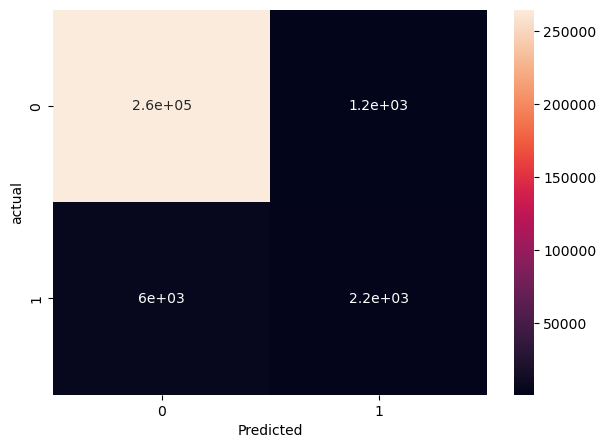

In [147]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('actual')

print(classification_report(y_test,y_pred, target_names=['Class 0','Class 1']))


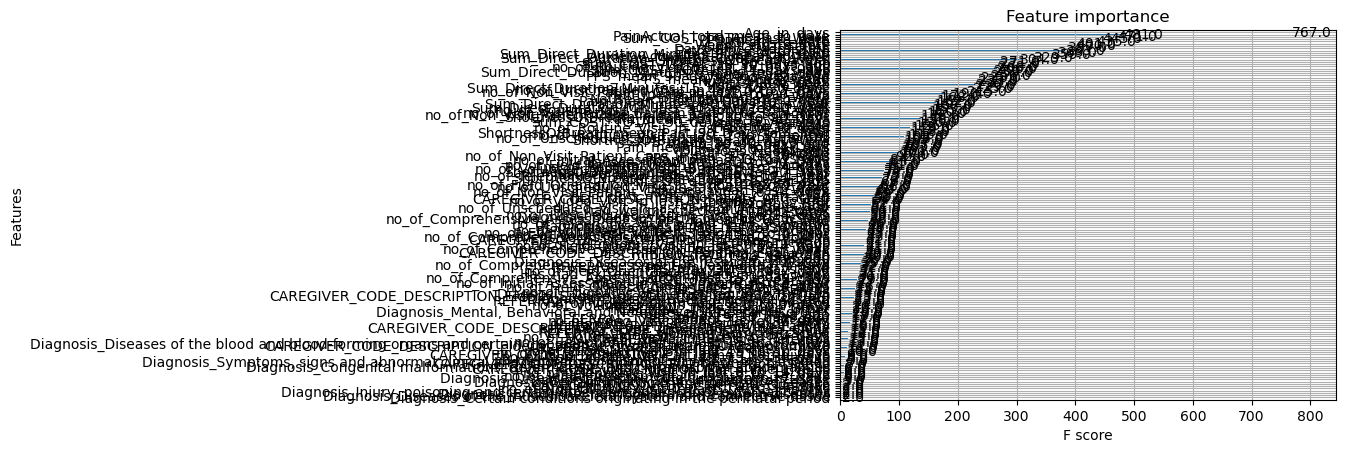

In [148]:
plot_importance(xgb)
plt.show()


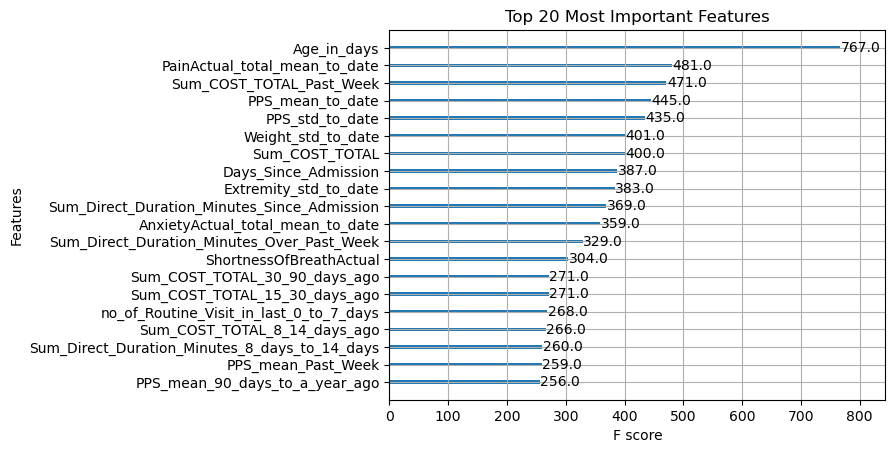

In [149]:
plot_importance(xgb, max_num_features=20)
plt.title('Top 20 Most Important Features')
plt.show()

In [150]:
# Assuming df is your DataFrame with the "Deadin14" column
counts = training_data['Response'].value_counts()
percentage_1 = counts[1] / counts.sum() * 100
percentage_0 = counts[0] / counts.sum() * 100
print("Percentage of 1's:", percentage_1)
print("Percentage of 0's:", percentage_0)

Percentage of 1's: 2.9453088107459906
Percentage of 0's: 97.054691189254


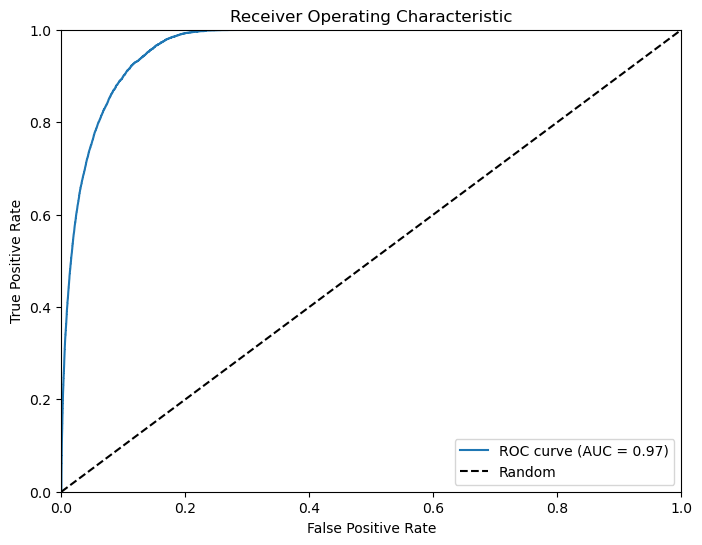

In [151]:
# Predict probabilities of the positive class
y_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Calculate the false positive rate and true positive rate for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Finding Optimal Threshold (Accuracy)

In [152]:
import numpy as np
from sklearn.metrics import roc_curve, auc

def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Calculate the Youden's J statistic (J = sensitivity + specificity - 1)
    youden_j = tpr - fpr
    optimal_threshold_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_threshold_idx]
    
    return optimal_threshold, roc_auc

# Assuming you have already trained your XGBoost model and have X_test and y_test data.
# Score the test data to get probabilities
y_prob = xgb.predict_proba(X_test)[:, 1]

# Find the optimal threshold and AUC
optimal_threshold, auc_score = find_optimal_threshold(y_test, y_prob)

print("Optimal Threshold:", optimal_threshold)
print("AUC Score:", auc_score)

Optimal Threshold: 0.026350746
AUC Score: 0.9654630966640365


# Writing Unbalanced CSV predictions (NOTE: EDIT DATE HERE IF NOT WORKING)

In [153]:


# Step 1: Filter data for j current week 
############################################################################################
##### IF NOT WORKING MANUALLY ENTER DATE IN FORMAT COMMENTED BELOW
###########################################################################################
#filtered_data = training_data[training_data['cutoff_date'] == '2023-06-12']
#today = datetime.today().date()

# Step 3: Extract Patient_ID, cutoff_date, and Response columns
patient_ids = current_training['PATIENT_ID']
cutoff_dates = current_training['cutoff_date']
#responses = filtered_data['Response']

# Step 4: Score the filtered data using the XGBoost model
X_fun = current_training.drop(columns=['PATIENT_ID', 'cutoff_date', 'Response'])
predictions = xgb.predict_proba(X_fun)[:, 1]

# Step 5: Re-append Patient_ID, cutoff_date, Response, and predictions
result_df = pd.DataFrame({
    'PATIENT_ID': patient_ids,
    'cutoff_date': cutoff_dates,
    'Probability': predictions
})
#Merging teams onto the table
result_df = result_df.merge(admissions[['PATIENT_ID', 'TEAM']], on='PATIENT_ID', how='left')
# Write the result to a CSV file
result_df.to_csv('predictions_Accuracy_14days.csv', index=False)

print(result_df)

      PATIENT_ID cutoff_date  Probability           TEAM
0             12  2023-06-19     0.000016  Arbor Hospice
1             25  2023-06-19     0.000053             NW
2             25  2023-06-19     0.000053             NW
3             26  2023-06-19     0.000016             SE
4             28  2023-06-19     0.000044  Arbor Hospice
...          ...         ...          ...            ...
5571       32043  2023-06-19     0.010248             NW
5572       32044  2023-06-19     0.011444             SE
5573       32046  2023-06-19     0.172916             NW
5574       32048  2023-06-19     0.116440             NW
5575       32052  2023-06-19     0.588657             NE

[5576 rows x 4 columns]


In [154]:
X_fun.head()

,Visits_Up_To_Date,Days_Since_Admission,Age_in_days,Sum_Direct_Duration_Minutes_Since_Admission,Sum_Direct_Duration_Minutes_Over_Past_Week,Sum_Direct_Duration_Minutes_8_days_to_14_days,Sum_Direct_Duration_Minutes_15_days_to_30_days,Sum_Direct_Duration_Minutes_30_days_to_90_days,Sum_Direct_Duration_Minutes_90 days_to_a_year,Sum_COST_TOTAL,...,REFERRAL_TYPE_Physician_Practice_Clinic,REFERRAL_TYPE_Physician_Non_HOM,REFERRAL_TYPE_Referring_Agency___Misc,SEX,MARITAL_STATUS,Communication,Emergency Risk,Ethnicity,Living Status,Religion
1370111,24,114,16156,739.0,0.0,0.0,0.0,0.0,0.0,526.90,...,0.0,0.0,0.0,1,2,1,3,10,7,42
1370112,66,87,21984,2905.0,0.0,0.0,0.0,0.0,0.0,1742.27,...,0.0,1.0,0.0,0,3,6,5,13,9,65
1370113,13,9,33375,861.0,0.0,0.0,0.0,0.0,0.0,507.08,...,0.0,0.0,0.0,0,4,6,5,13,9,65
1370114,37,29,37006,2426.0,0.0,0.0,0.0,0.0,0.0,1042.52,...,0.0,0.0,0.0,0,4,1,3,10,6,39
1370115,503,800,35227,28678.0,0.0,0.0,0.0,0.0,0.0,9615.74,...,0.0,0.0,0.0,0,3,1,3,10,6,39


# Balanced XGBoost


In [155]:
from xgboost import XGBClassifier


scale_pos_weight = np.sqrt((len(y_train) - sum(y_train)) / sum(y_train))
#scale_pos_weight *= 2 # Increase the scale_pos_weight to make it more aggressive

# Initialize the XGBoost classifier with the updated scale_pos_weight
xgb = XGBClassifier(subsample=0.9, n_estimators=600, min_child_weight=1, max_depth=5, learning_rate=0.1, colsample_bytree=0.8, random_state=50, scale_pos_weight=scale_pos_weight)
xgb.fit(X_train, y_train)



accuracy = xgb.score(X_test, y_test)
accuracy

0.956569339070078

              precision    recall  f1-score   support

     Class 0       0.99      0.97      0.98    265850
     Class 1       0.37      0.68      0.48      8173

    accuracy                           0.96    274023
   macro avg       0.68      0.82      0.73    274023
weighted avg       0.97      0.96      0.96    274023



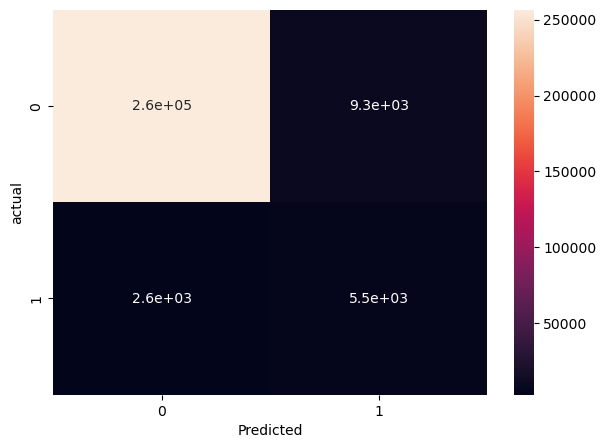

In [156]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('actual')

print(classification_report(y_test,y_pred, target_names=['Class 0','Class 1']))


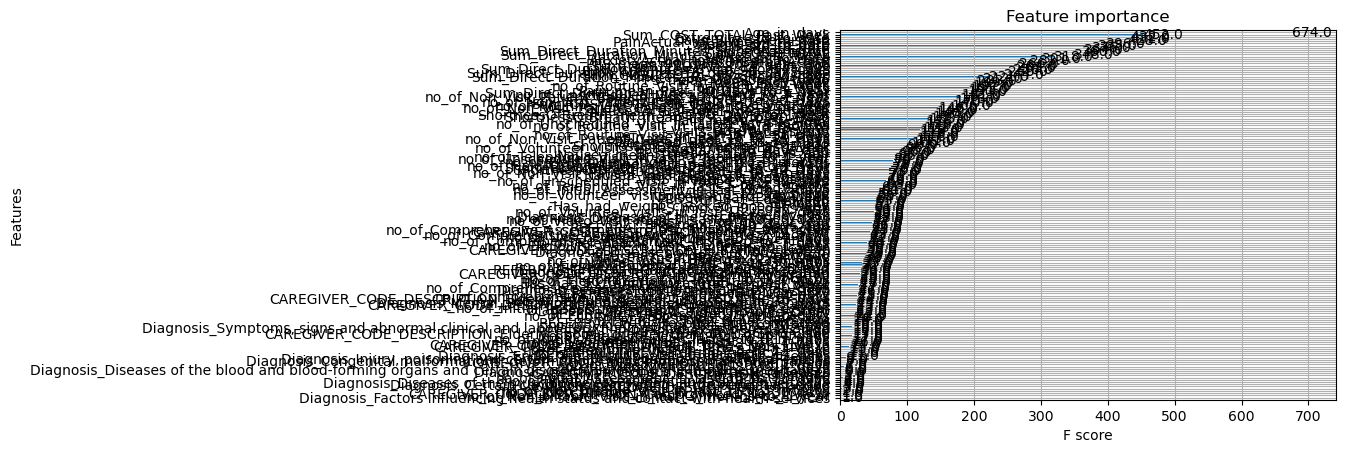

In [157]:
plot_importance(xgb)
plt.show()


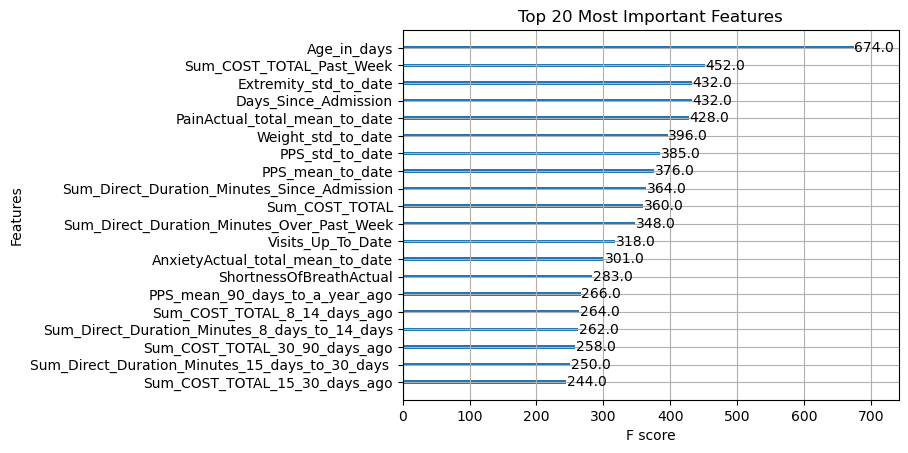

In [158]:
plot_importance(xgb, max_num_features=20)
plt.title('Top 20 Most Important Features')
plt.show()

In [159]:
# Assuming df is your DataFrame with the "Deadin14" column
counts = training_data['Response'].value_counts()
percentage_1 = counts[1] / counts.sum() * 100
percentage_0 = counts[0] / counts.sum() * 100

print("Percentage of 1's:", percentage_1)
print("Percentage of 0's:", percentage_0)

Percentage of 1's: 2.9453088107459906
Percentage of 0's: 97.054691189254


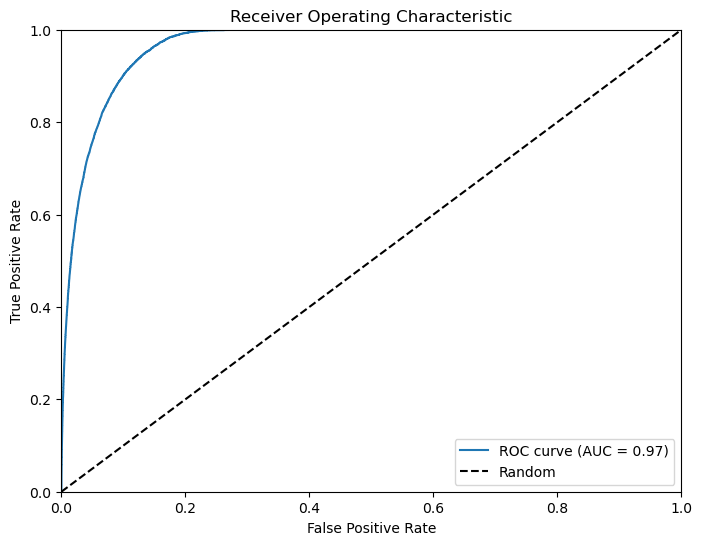

In [160]:
# Predict probabilities of the positive class
y_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Calculate the false positive rate and true positive rate for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Finding Optimal Threshold (Aggressive)

In [161]:
import numpy as np
from sklearn.metrics import roc_curve, auc

def find_optimal_threshold(y_true, y_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Calculate the Youden's J statistic (J = sensitivity + specificity - 1)
    youden_j = tpr - fpr
    optimal_threshold_idx = np.argmax(youden_j)
    optimal_threshold = thresholds[optimal_threshold_idx]
    
    return optimal_threshold, roc_auc

# Assuming you have already trained your XGBoost model and have X_test and y_test data.
# Score the test data to get probabilities
y_prob = xgb.predict_proba(X_test)[:, 1]

# Find the optimal threshold and AUC
optimal_threshold, auc_score = find_optimal_threshold(y_test, y_prob)

print("Optimal Threshold:", optimal_threshold)
print("AUC Score:", auc_score)

Optimal Threshold: 0.13994236
AUC Score: 0.9654883549486478


# Writing Balanced CSV predictions  (NOTE: EDIT DATE HERE IF NOT WORKING)

In [162]:


# Step 1: Filter data for j current week 
############################################################################################
##### IF NOT WORKING MANUALLY ENTER DATE IN FORMAT COMMENTED BELOW
###########################################################################################
#filtered_data = training_data[training_data['cutoff_date'] == '2023-06-12']
########################################################################################
#today = datetime.today().date()

# Step 3: Extract Patient_ID, cutoff_date, and Response columns
patient_ids = current_training['PATIENT_ID']
cutoff_dates = current_training['cutoff_date']
#responses = filtered_data['Response']

# Step 4: Score the filtered data using the XGBoost model
X_fun = current_training.drop(columns=['PATIENT_ID', 'cutoff_date', 'Response'])
predictions = xgb.predict_proba(X_fun)[:, 1]

# Step 5: Re-append Patient_ID, cutoff_date, Response, and predictions
result_df = pd.DataFrame({
    'PATIENT_ID': patient_ids,
    'cutoff_date': cutoff_dates,
    'Probability': predictions
})
result_df = result_df.merge(admissions[['PATIENT_ID', 'TEAM']], on='PATIENT_ID', how='left')

# Write the result to a CSV file
result_df.to_csv('predictions_Aggressive_14days.csv', index=False)

print(result_df)

      PATIENT_ID cutoff_date  Probability           TEAM
0             12  2023-06-19     0.000095  Arbor Hospice
1             25  2023-06-19     0.000161             NW
2             25  2023-06-19     0.000161             NW
3             26  2023-06-19     0.000056             SE
4             28  2023-06-19     0.000188  Arbor Hospice
...          ...         ...          ...            ...
5571       32043  2023-06-19     0.039118             NW
5572       32044  2023-06-19     0.076815             SE
5573       32046  2023-06-19     0.591326             NW
5574       32048  2023-06-19     0.508180             NW
5575       32052  2023-06-19     0.893310             NE

[5576 rows x 4 columns]


In [163]:
training_data['cutoff_date'].max()

Timestamp('2023-06-12 00:00:00')

In [164]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Logisitic Regression Model Using Top 10 Variables

In [165]:
# Create the imputer object
import statsmodels.api as sm
imputer = SimpleImputer(strategy='mean')

# Assuming 'training_data' is your larger DataFrame
selected_columns = ['Age_in_days', 'Extremity_std_to_date', 'Sum_COST_TOTAL_Past_Week', 'Days_Since_Admission',
                    'PainActual_total_mean_to_date', 'Weight_std_to_date', 'Sum_COST_TOTAL', 'PPS_mean_to_date',
                    'Sum_Direct_Duration_Minutes_Since_Admission', 'PPS_mean_to_date', 
                    'AnxietyActual_total_mean_to_date' ]

new_X_train = X_train[selected_columns]

new_X_test = X_test[selected_columns]
# Fit and transform the training data to fill the missing values with mean
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data to fill the missing values with mean
X_test_imputed = imputer.transform(X_test)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=50)

# Train the model on the training data
logreg_model.fit(X_train_imputed, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test_imputed)

# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

# Get the coefficients of the logistic regression model
coefficients = logreg_model.coef_[0]

# Get the selected feature names
selected_features = new_X_train.columns

# Create a dictionary to store the feature-coefficient associations
feature_coefficients = dict(zip(selected_features, coefficients))

# Print the feature-coefficient associations
print("Feature Coefficients:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature}: {coefficient}")


Confusion Matrix:
[[264763   1087]
 [  7334    839]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      1.00      0.98    265850
     Class 1       0.44      0.10      0.17      8173

    accuracy                           0.97    274023
   macro avg       0.70      0.55      0.58    274023
weighted avg       0.96      0.97      0.96    274023

Feature Coefficients:
Age_in_days: 0.0011800049317765185
Extremity_std_to_date: -0.0005321525928387936
Sum_COST_TOTAL_Past_Week: -6.931917158465613e-05
Days_Since_Admission: 0.00020492543604843353
PainActual_total_mean_to_date: 0.0018315947689710023
Weight_std_to_date: -0.0007703300413109237
Sum_COST_TOTAL: -0.0016559252981320405
PPS_mean_to_date: -0.0010100557692836775
Sum_Direct_Duration_Minutes_Since_Admission: 9.545296108538799e-06
AnxietyActual_total_mean_to_date: 0.005861978021939304
